<h1><center><font color="indigo">PROJETO - TURNOVER FUNCIONÁRIOS</font></center></h1>

<center><img src="CapaTurnover.jpg"/></center>
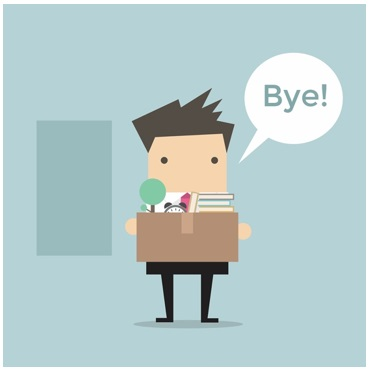

<h2><center><font color="rebeccapurple">1.0 - ENTENDIMENTO DO NEGÓCIO</font></center></h2>

<h3><center>CONTEXTUALIZAÇÃO</center></h3>

O Turnover (rotatividade de funcionários) é um grande problema para as empresas. Sempre que um funcionário deixa um determinado trabalho, a empresa perde dinheiro e tempo com novas entrevistas e treinamentos do novo funcionário. Isso sem falar da perda de produtividade do setor afetado por esse turnover. São muitas as questões que fazem um funcionário deixar a empresa, entre eles: Melhores oportunidades, clima organizacional ruim, chefes ruins, baixo equilíbrio entre vida pessoal e profissional, entre outros.


O Turnover é utilizado como métrica em muitas empresas:


$$
TurnOver = Quantidade de Funcionários que Saíram / Quantidade de Funcionários
$$


Para tentar entender quais as características que fazem um funcionário ficar ou deixar uma empresa de Tecnologia, o RH desta empresa catalogou informações de 1470 funcionários que deixaram ou permaneceram na companhia no último ano. O resultado desse levantamento gerou 19 possíveis fatores que explicam o comportamento do turnover, que estão disponíveis no arquivo Base_RH.xlsx.


Com base nisso, o RH encomendou um estudo para o analista de dados da área para responder a seguinte pergunta:


#### Quais políticas/fatores da empresa deveriam mudar de forma a minimizar o turnover?

<h2><center><font color="rebeccapurple">2.0 - BIBLIOTECAS E FUNÇÕES</font></center></h2>

<center><h3><font color="purple">2.1 - BIBLIOTECAS</font></h3></center>

In [1]:
import pandas as pd
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import PercentFormatter
import seaborn as sbs
import math

<center><h3><font color="purple">2.2 - FUNÇÕES</font></h3></center>

In [142]:
# CALCULAR FREQUÊNCIA RELATIVA DE VARIÁVEIS CATEGÓRICAS

def freq_relativa_cat(variavel):
    
    series = df_rh[variavel].value_counts()
    
    total_freq = series.sum()

    tabela = pd.DataFrame(series)

    tabela['Freq.Relativa (%)'] = round(tabela[variavel] / total_freq * 100,2)
    
    df = pd.DataFrame({variavel:tabela.index,'Freq.Absoluta':tabela[variavel],
                   'Freq.Relativa (%)':tabela['Freq.Relativa (%)']}).reset_index(drop=True)

    return df


# CALCULAR FREQUÊNCIA ACUMULADA

def freq_acumulada(tabela):
    
    tabela['Freq.Acumulada (%)'] = tabela['Freq.Relativa (%)'].cumsum()

    return tabela



# CALCULAR FREQUÊNCIA RELATIVA DE VARIÁVEIS NUMÉRICAS

def freq_num(variavel,agrupamento,nome_col):
    
    df = df_rh[variavel].groupby(by=agrupamento).count()

    # Montando o DataFrame com a Frequência Absoluta

    indice = df.index

    valores = []

    for i in df.values:
    
        valores.append(int(i))

    df_ = pd.DataFrame({nome_col:indice,'Freq.Absoluta':valores})

    # Calculando Frequência Relativa 

    total_freq = df_['Freq.Absoluta'].sum()

    df_['Freq.Relativa (%)'] = round(df_['Freq.Absoluta'] / total_freq *100,2)

    # Calculando Frequência Acumulada

    freq_acumulada(df_)

    return df_



# ORDENAR AS CATEGORIAS

def ordenar_categorias(tabela,coluna,ordem):

        tipo_categorico = pd.CategoricalDtype(categories=ordem, ordered=True)
    
        tabela[coluna] = tabela[coluna].astype(tipo_categorico)
    
        tabela = tabela.sort_values(by=coluna).reset_index(drop=True)
    
        return tabela



# MEDIDAS VARIÁVEIS NUMÉRICAS

def medidas_numericas(variavel, casas_decimais=None):
    
    tabela = pd.DataFrame({'Contagem':[round(df_rh[variavel].count(),casas_decimais)],
                            'Média':[round(df_rh[variavel].mean(),casas_decimais)],
                            'Mediana':[round(df_rh[variavel].median(),casas_decimais)],
                            'Moda':[round(df_rh[variavel].mode()[0],casas_decimais)],
                            'Variância': [round(df_rh[variavel].var(),casas_decimais)],
                            'Desvio Padrão':[round(df_rh[variavel].std(),casas_decimais)],
                            'IQR':[round(df_rh[variavel].quantile(0.75) - df_rh[variavel].quantile(0.25) ,casas_decimais)],
                            '1º Quartil':[round(df_rh[variavel].quantile(0.25),casas_decimais)],
                            '2º Quartil':[round(df_rh[variavel].quantile(0.5),casas_decimais)],
                            '3º Quartil':[round(df_rh[variavel].quantile(0.75),casas_decimais)],
                            'Assimetria':[round(df_rh[variavel].skew(),casas_decimais)],
                            'Curtose':[round(df_rh[variavel].kurtosis(),casas_decimais)],
                            'Mínimo':[round(df_rh[variavel].min(),casas_decimais)],
                            'Valor Máximo':[round(df_rh[variavel].max(),casas_decimais)]})

    tabela.index=[variavel]
    
    return tabela



# GRÁFICO DE PARETO PARA VARIÁVEIS CATEGÓRICAS

def pareto(tabela, variavel, freq_abs,titulo, freq_acum):
    
    fig, ax = plt.subplots(figsize=(10,5))
    ax = sbs.barplot(x=tabela[variavel], y=tabela[freq_abs], color='darkturquoise')
    ax.set_title(titulo, fontsize=14)
    
    gap1 = 10
    for i in range(len(tabela[freq_abs])):
        ax.annotate(tabela[freq_abs][i],(tabela[variavel][i], tabela[freq_abs][i] + gap1), size=9)
        
    ax2 = ax.twinx()
    
    ax2.plot(tabela[variavel], tabela[freq_acum], color='C1', marker='D', ms=7, label=titulo)
    ax2.yaxis.set_major_formatter(PercentFormatter())
    
    ax.tick_params(axis='y', colors='darkturquoise')
    ax2.tick_params(axis='y', colors='C1')
    ax2.set_ylim([0,110])
    
    for tick in ax.get_xticklabels():
        tick.set_rotation(0)
        
    gap2 = -5
    for i in range(len(tabela[freq_acum])):
        ax2.annotate('%.2f' % tabela[freq_acum][i], (tabela[variavel][i], tabela[freq_acum][i] + gap2), size=9)
    
    plt.legend() # para mostrar a legenda
    return plt.show()
    
    
# GRÁFICO DE PARETO PARA VARIÁVEIS NUMÉRICAS

def pareto_num(tabela, variavel, freq_abs,titulo, freq_acum, gap1, gap2):
    
    tabela[variavel] = tabela[variavel].astype('str')
    
    fig, ax = plt.subplots(figsize=(20,5))
    ax = sbs.barplot(x=tabela[variavel], y=tabela[freq_abs], color='darkturquoise')
    ax.set_title(titulo, fontsize=14)
    
    gap1 = gap1
    for i in range(len(tabela[freq_abs])):
        ax.annotate(tabela[freq_abs][i],(tabela[variavel][i], tabela[freq_abs][i] + gap1), size=9)
        
    ax2 = ax.twinx()
    
    ax2.plot(tabela[variavel], tabela[freq_acum], color='C1', marker='D', ms=7, label=titulo)
    ax2.yaxis.set_major_formatter(PercentFormatter())
    
    ax.tick_params(axis='y', colors='darkturquoise')
    ax2.tick_params(axis='y', colors='C1')
    ax2.set_ylim([0,110])
    
    for tick in ax.get_xticklabels():
        tick.set_rotation(0)
        
    gap2 = gap2
    for i in range(len(tabela[freq_acum])):
        ax2.annotate('%.2f' % tabela[freq_acum][i], (tabela[variavel][i], tabela[freq_acum][i] + gap2), size=9)
    
    plt.legend() # para mostrar a legenda
    return plt.show()



# GRÁFICOS DE DISTRIBUIÇÃO DOS DADOS

def distribuicao(df):
    
    fig, axes = plt.subplots(1, 2, figsize=(10,3))

    fig.suptitle('Distribuição dos dados', fontsize=14)

    sbs.kdeplot(ax=axes[0],data=df, x='Freq.Absoluta',color='darkturquoise')

    sbs.boxplot(ax=axes[1],data=df, x='Freq.Absoluta', color='darkturquoise')

    return plt.show();



# GRÁFICO PIZZA - VARIÁVEIS CATEGÓRICAS

def pizza(tabela,variavel,titulo):
    
    labels = [tabela[variavel][0],tabela[variavel][1]]

    freq = [tabela['Freq.Absoluta'][0],tabela['Freq.Absoluta'][1]]  

    fig, ax = plt.subplots()

    ax.pie(freq, autopct='%1.1f%%', colors=['c','cadetblue'], explode=(0,.1))

    ax.set_title(titulo)

    ax.legend(bbox_to_anchor=(1, 0, 0.5,1), loc='center left', labels=labels)

    plt.show()
    

    
# CÁLCULO DO INFORMATION VALUE - VARIÁVEIS CATEGÓRICAS

def iv_cat(variavel,nome_coluna,ordem=None):
    
    df = df_rh[['Funcionário_deixou_a_empresa',variavel]]
    
    df_group = df.groupby([variavel,'Funcionário_deixou_a_empresa'])['Funcionário_deixou_a_empresa'].count()
    
    c1 = []
    c2 = []
    c3 = []
    aux = 0

    for i in df_group.items():   
        c1.append(i[aux][aux])
        c2.append(i[aux][aux+1])
        c3.append(i[aux+1])
        
        
    tabela_aux = pd.DataFrame({'col1':c1,'col2':c2,'col3':c3})
    

    sim = []
    nao = []

    for i in range(len(tabela_aux)):
        if i % 2 == 0:
            nao.append(tabela_aux['col3'][i])
        else:
            sim.append(tabela_aux['col3'][i])       
        
        
    dataframe = pd.DataFrame({nome_coluna: tabela_aux['col1'].unique(),'Deixou a empresa? SIM':sim,
                              'Deixou a empresa? NÃO':nao,'Total':0,'Freq.Relativa':0,'% SIM':0,'% NÃO':0,
                              '% TurnOver':0,'ODDS':0,'IV':0})
    
    if ordem == None:
        pass
        
    else:
        dataframe = ordenar_categorias(dataframe,nome_coluna,ordem)
        
    dataframe['Total'] = dataframe['Deixou a empresa? SIM'] + dataframe['Deixou a empresa? NÃO']
    dataframe['Freq.Relativa'] = round(dataframe['Total'] / dataframe['Total'].sum() * 100,2)
    dataframe['% SIM'] = round(dataframe['Deixou a empresa? SIM'] / dataframe['Deixou a empresa? SIM'].sum() * 100,2)
    dataframe['% NÃO'] = round(dataframe['Deixou a empresa? NÃO'] / dataframe['Deixou a empresa? NÃO'].sum() * 100,2)
    dataframe['% TurnOver'] = round(dataframe['Deixou a empresa? SIM'] / dataframe['Total'] * 100,2)
    dataframe['ODDS'] = round(dataframe['% SIM'] / dataframe['% NÃO'] ,2)
    dataframe['IV'] = round((dataframe['% SIM'] - dataframe['% NÃO']) * (np.log(dataframe['ODDS'])) / 100,3)

    return dataframe


# CÁLCULO DO INFORMATION VALUE - VARIÁVEIS NUMÉRICAS

def iv_num(variavel,agrupamento,nome_coluna):
    
    df = df_rh[['Funcionário_deixou_a_empresa',variavel]]

    agrup = pd.cut(df[variavel], bins=np.arange(df[variavel].min(), df[variavel].max()+1, agrupamento))
    
    df_group = df.groupby(by=[agrup,'Funcionário_deixou_a_empresa'])['Funcionário_deixou_a_empresa'].count()
    
    c1 = []
    c2 = []
    c3 = []
    aux = 0

    for i in df_group.items():   
        c1.append(i[aux][aux])
        c2.append(i[aux][aux+1])
        c3.append(i[aux+1])
        
    tabela_aux = pd.DataFrame({'col1':c1,'col2':c2,'col3':c3})
   
    ordem = None

    sim = []
    nao = []

    for i in range(len(tabela_aux)):
        if i % 2 == 0:
            nao.append(tabela_aux['col3'][i])
        else:
            sim.append(tabela_aux['col3'][i])       
        
        
    dataframe = pd.DataFrame({nome_coluna: tabela_aux['col1'].unique(),'Deixou a empresa? SIM':sim,
                              'Deixou a empresa? NÃO':nao,'Total':0,'Freq.Relativa':0,'% SIM':0,'% NÃO':0,
                              '% TurnOver':0,'ODDS':0,'IV':0})
    
    if ordem == None:
        pass
        
    else:
        dataframe = ordenar_categorias(dataframe,nome_coluna,ordem)
    
    np.seterr(divide = 'ignore') 
        
    dataframe['Total'] = dataframe['Deixou a empresa? SIM'] + dataframe['Deixou a empresa? NÃO']
    dataframe['Freq.Relativa'] = round(dataframe['Total'] / dataframe['Total'].sum() * 100,2)
    dataframe['% SIM'] = round(dataframe['Deixou a empresa? SIM'] / dataframe['Deixou a empresa? SIM'].sum() * 100,2)
    dataframe['% NÃO'] = round(dataframe['Deixou a empresa? NÃO'] / dataframe['Deixou a empresa? NÃO'].sum() * 100,2)
    dataframe['% TurnOver'] = round(dataframe['Deixou a empresa? SIM'] / dataframe['Total'] * 100,2)
    dataframe['ODDS'] = round(dataframe['% SIM'] / dataframe['% NÃO'] ,2)
    dataframe['IV'] = round((dataframe['% SIM'] - dataframe['% NÃO']) * (np.log(dataframe['ODDS'])) / 100,3)

    return dataframe

    
# IMPRIME O RESULTADO DO IV

def resultado_iv(dataframe, variavel):
    
    iv = round(dataframe['IV'].sum(),3)
    
    if iv < 0.02:
        print(f'O IV da variável - "{variavel}" é de: {round(dataframe["IV"].sum(),3)} = MUITO FRACO')
    
    if iv >= 0.02 and iv < 0.1:
        print(f'O IV da variável - "{variavel}" é de: {round(dataframe["IV"].sum(),3)} = FRACO')
        
    if iv >= 0.1 and iv < 0.3:
        print(f'O IV da variável - "{variavel}" é de: {round(dataframe["IV"].sum(),3)} = MÉDIO')
        
    if iv >= 0.3 and iv < 0.5:
        print(f'O IV da variável - "{variavel}" é de: {round(dataframe["IV"].sum(),3)} = FORTE')
        
    if iv >= 0.5:
        print(f'O IV da variável - "{variavel}" é de: {round(dataframe["IV"].sum(),3)} = MUITO FORTE, verifique!')

<h2><center><font color="rebeccapurple">3.0 - ENTENDIMENTO DOS DADOS</font></center></h2>

<center><h3><font color="purple">3.1 - DESCRIÇÃO DAS VARIÁVEIS</font></h3></center>

<center><img src="Variaveis.png"/></center>

<center><h3><font color="purple">3.2 - COLETA DOS DADOS</font></h3></center>

In [3]:
# Carregando os dados
df_rh = pd.read_excel('Base_RH.xlsx', sheet_name='Base', header=6)

df_rh.head(10)

,ID,Funcionário_deixou_a_empresa,Idade,Frequência de Viagens,Distância_do_trabalho,Formação,E-Sat,Gênero,Estado_Civil,Salário,...,Faz_hora_extras?,Perc_de_aumento,Qte_ações_da_empresa,Tempo_de_carreira,Horas_de_treinamento,Equilibrio_de_Vida,Tempo_de_empresa,Anos_no_mesmo_cargo,Anos_desde_a_ultima_promocao,Anos_com_o_mesmo_chefe
0,1,Sim,41,Viaja raramente,1,Ensino Técnico,Médio,M,Solteiro,5993,...,Sim,11,0,8,0,Ruim,6,4,0,5
1,2,Não,49,Viaja frequentemente,8,Ensino Médio,Alto,H,Casado,5130,...,Não,23,1,10,3,Muito bom,10,7,1,7
2,3,Sim,37,Viaja raramente,2,Ensino Técnico,Muito Alto,H,Solteiro,2090,...,Sim,15,0,7,3,Muito bom,0,0,0,0
3,4,Não,33,Viaja frequentemente,3,Mestrado,Muito Alto,M,Casado,2909,...,Sim,11,0,8,3,Muito bom,8,7,3,0
4,5,Não,27,Viaja raramente,2,Ensino Médio,Baixo,H,Casado,3468,...,Não,12,1,6,3,Muito bom,2,2,2,2
5,6,Não,32,Viaja frequentemente,2,Ensino Técnico,Muito Alto,H,Solteiro,3068,...,Não,13,0,8,2,Bom,7,7,3,6
6,7,Não,59,Viaja raramente,3,Ensino Superior,Alto,M,Casado,2670,...,Sim,20,3,12,3,Bom,1,0,0,0
7,8,Não,30,Viaja raramente,24,Ensino Médio,Muito Alto,H,Divorciado,2693,...,Não,22,1,1,2,Muito bom,1,0,0,0
8,9,Não,38,Viaja frequentemente,23,Ensino Superior,Muito Alto,H,Solteiro,9526,...,Não,21,0,10,2,Muito bom,9,7,1,8
9,10,Não,36,Viaja raramente,27,Ensino Superior,Alto,H,Casado,5237,...,Não,13,2,17,3,Bom,7,7,7,7


<center><h3><font color="purple">3.3 - ANÁLISE EXPLORATÓRIA</font></h3></center>

<center><h4><font color="darkmagenta">3.3.1 - UNIDIMENSIONAL</font></h4></center>

**<center><font color="darkorchid">VARIÁVEL: Funcionário_deixou_a_empresa</font></center>**

**<center>Tabela de Frequências</center>**

In [4]:
tabela = freq_relativa_cat('Funcionário_deixou_a_empresa')
tabela

,Funcionário_deixou_a_empresa,Freq.Absoluta,Freq.Relativa (%)
0,Não,1233,83.88
1,Sim,237,16.12


**<center>Gráficos</center>**

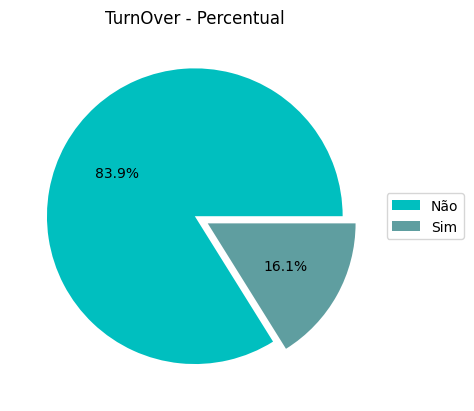

In [5]:
pizza(tabela,'Funcionário_deixou_a_empresa','TurnOver - Percentual')

**<center>Análise / Insights</center>**

1. De 1.470 funcionários da base de dados, 16% pediram demissão.
2. O que define uma taxa de TurnOver alta ou baixa? *(QUESTIONAR ÁREA DE NEGÓCIO)*
3. Caso fosse necessário fazer uma previsão de TurnOver com essa mesma base, será necessário aplicar técnica de nivelamento para que o algoritmo não "aprenda mais" sobre uma das opções do que outra impactando na capacidade de previsão do modelo.

**<center><font color="darkorchid">VARIÁVEL: Frequência de Viagens</font></center>**

**<center>Tabela de Frequências</center>**

In [6]:
tabela1 = freq_relativa_cat('Frequência de Viagens')

ordem1 = ['Não viaja', 'Viaja raramente', 'Viaja frequentemente']

tabela1 = ordenar_categorias(tabela1,'Frequência de Viagens',ordem1)

tabela1 = freq_acumulada(tabela1)

tabela1

,Frequência de Viagens,Freq.Absoluta,Freq.Relativa (%),Freq.Acumulada (%)
0,Não viaja,150,10.20,10.20
1,Viaja raramente,1043,70.95,81.15
2,Viaja frequentemente,277,18.84,99.99


**<center>Gráfico</center>**

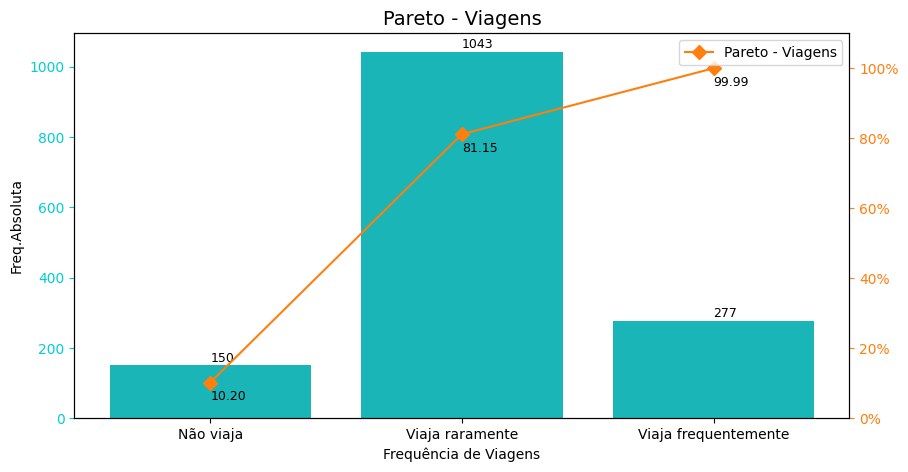

In [7]:
pareto(tabela1,'Frequência de Viagens','Freq.Absoluta','Pareto - Viagens','Freq.Acumulada (%)')

**<center>Análise / Insights</center>**

1. 81% dos funcionários não viajam ou viajam raramente.
2. 89% dos funcionários já viajaram alguma vez pela empresa.
3. 10% dos funcionários nunca viajaram pela empresa.

**<center><font color="darkorchid">VARIÁVEL: Formação</font></center>**

**<center>Tabela de Frequências</center>**

In [8]:
tabela2 = freq_relativa_cat('Formação')

ordem2 = ['Ensino Médio', 'Ensino Técnico', 'Ensino Superior', 'Mestrado','Doutorado']

tabela2 = ordenar_categorias(tabela2,'Formação', ordem2)

tabela2 = freq_acumulada(tabela2)

tabela2

,Formação,Freq.Absoluta,Freq.Relativa (%),Freq.Acumulada (%)
0,Ensino Médio,170,11.56,11.56
1,Ensino Técnico,282,19.18,30.74
2,Ensino Superior,572,38.91,69.65
3,Mestrado,398,27.07,96.72
4,Doutorado,48,3.27,99.99


**<center>Gráfico</center>**

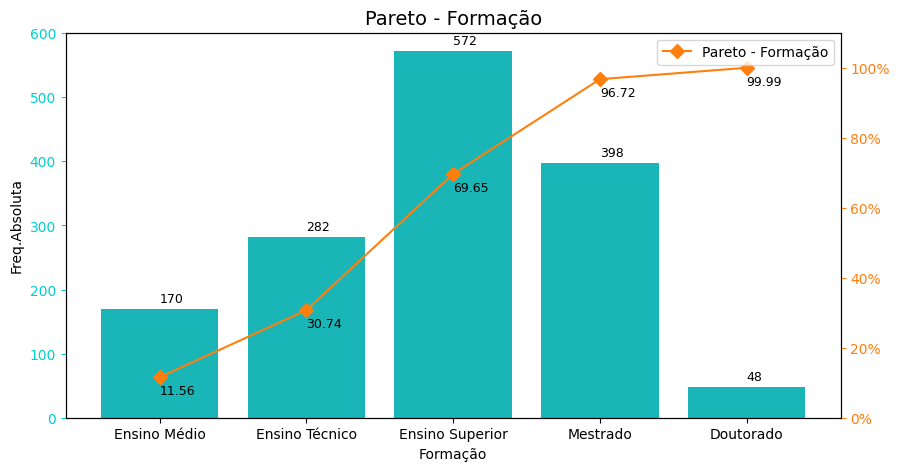

In [9]:
pareto(tabela2,'Formação','Freq.Absoluta','Pareto - Formação','Freq.Acumulada (%)')

**<center>Análise / Insights</center>**

1. Quase 70% dos funcionários da base de dados possuem até o ensino superior.
2. A maioria dos funcionários (65%) possuem ensino superior e mestrado.
3. Uma pequena quantidade de funcionários fez doutorado (3%)

**<center><font color="darkorchid">VARIÁVEL: E-Sat</font></center>**

**<center>Tabela de Frequências</center>**

In [10]:
tabela3 = freq_relativa_cat('E-Sat')

ordem3 = ['Baixo','Médio','Alto','Muito Alto']

tabela3 = ordenar_categorias(tabela3,'E-Sat', ordem3)

tabela3 = freq_acumulada(tabela3)

tabela3

,E-Sat,Freq.Absoluta,Freq.Relativa (%),Freq.Acumulada (%)
0,Baixo,284,19.32,19.32
1,Médio,287,19.52,38.84
2,Alto,453,30.82,69.66
3,Muito Alto,446,30.34,100.00


**<center>Gráfico</center>**

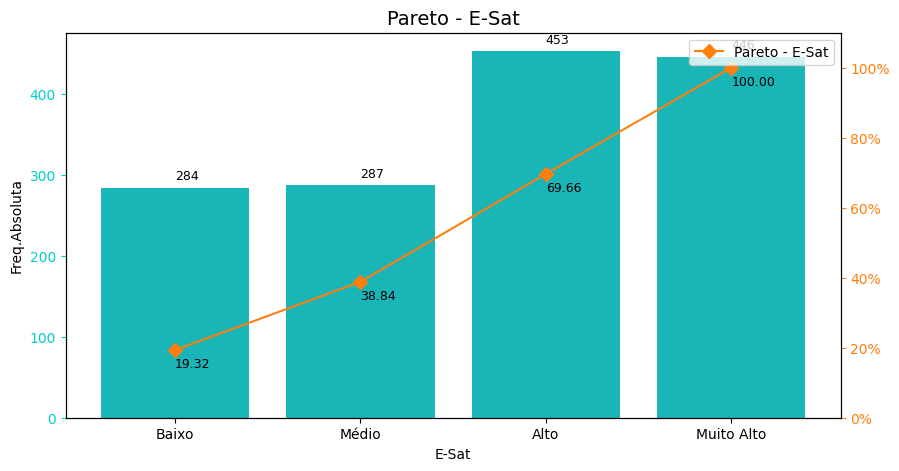

In [11]:
pareto(tabela3,'E-Sat','Freq.Absoluta','Pareto - E-Sat','Freq.Acumulada (%)')

**<center>Análise / Insights</center>**

1. Mais da metade dos funcionários (61%) estão satisfeitos com a organização (Alto e Muito Alto).
2. Qual é o limite aceitável para Baixo e médio? *(QUESTIONAR ÁREA DE NEGÓCIO)*
3. Existe dados sobre o motivo da baixa satisfação de alguns funcionários? *(QUESTIONAR ÁREA DE NEGÓCIO)*

**<center><font color="darkorchid">VARIÁVEL: Gênero</font></center>**

**<center>Tabela de Frequências</center>**

In [12]:
tabela4 = freq_relativa_cat('Gênero')

tabela4

,Gênero,Freq.Absoluta,Freq.Relativa (%)
0,H,882,60.0
1,M,588,40.0


**<center>Gráfico</center>**

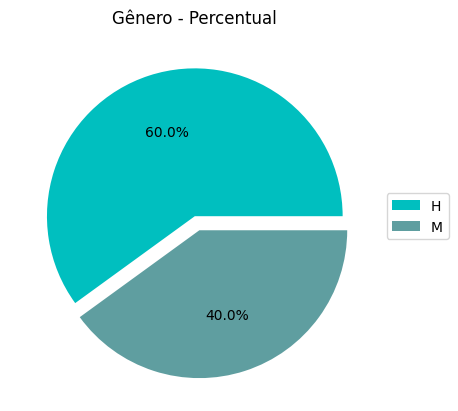

In [13]:
pizza(tabela4,'Gênero','Gênero - Percentual')

**<center>Análise / Insights</center>**

1. O quadro de funcionários é composto de 60% homens e 40% mulheres.
2. Existe alguma exigência para alguns cargos que precisam ser desempenhados por homens que justifique a diferença de percentual entre gêneros? *(QUESTIONAR ÁREA DE NEGÓCIO)*
3. É pouco provável que esta variável cause a taxa de TurnOver.

**<center><font color="darkorchid">VARIÁVEL: Estado_Civil</font></center>**

**<center>Tabela de Frquências</center>**

In [14]:
tabela5 = freq_relativa_cat('Estado_Civil')

ordem5 = ['Solteiro','Casado','Divorciado']

tabela5 = ordenar_categorias(tabela5,'Estado_Civil', ordem5)

tabela5 = freq_acumulada(tabela5)

tabela5

,Estado_Civil,Freq.Absoluta,Freq.Relativa (%),Freq.Acumulada (%)
0,Solteiro,470,31.97,31.97
1,Casado,673,45.78,77.75
2,Divorciado,327,22.24,99.99


**<center>Gráfico</center>**

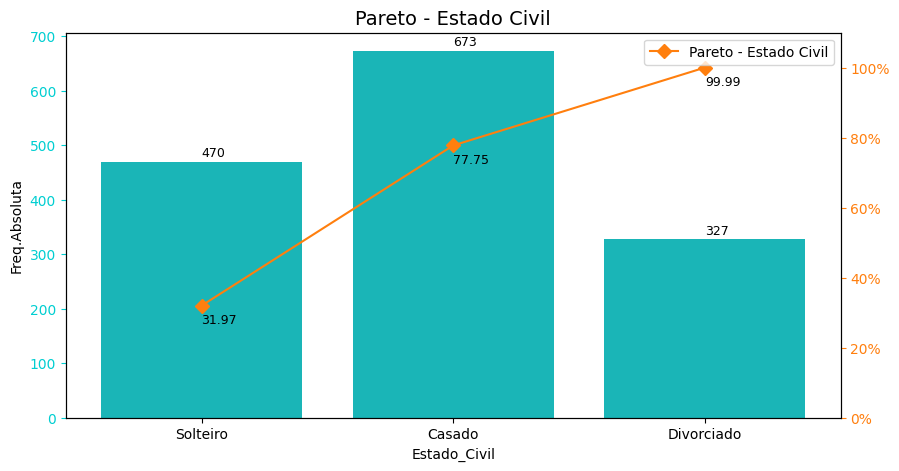

In [15]:
pareto(tabela5,'Estado_Civil','Freq.Absoluta','Pareto - Estado Civil','Freq.Acumulada (%)')

**<center>Análise / Insights</center>**

1. Quase metade dos funcionários (46%) são casados.

**<center><font color="darkorchid">VARIÁVEL: Faz_hora_extras?</font></center>**

**<center>Tabela de Frequência</center>**

In [16]:
tabela6 = freq_relativa_cat('Faz_hora_extras?')
tabela6

,Faz_hora_extras?,Freq.Absoluta,Freq.Relativa (%)
0,Não,1054,71.7
1,Sim,416,28.3


**<center>Gráfico</center>**

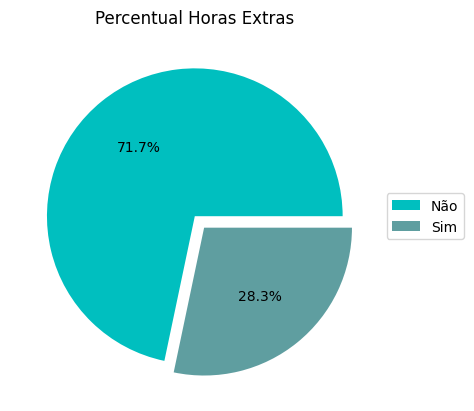

In [17]:
pizza(tabela6,'Faz_hora_extras?','Percentual Horas Extras')

**<center>Análise / Insights</center>**

1. Mais de 70% dos funcionários não fazem horas extras.
2. Existe alguma política dentro da empresa para não fazerem horas extras para não onerar a folha de pagamento e não gerar stress ou uma qualidade de vida ruim pelo fato de que se trabalham muito não tem tempo para passar com a família ou fazer outras atividades? *(QUESTIONAR ÁREA DE NEGÓCIO)*
3. É provavel que esta variável cause o TurnOver.

**<center><font color="darkorchid">VARIÁVEL: Equilibrio_de_Vida</font></center>**

**<center>Tabela de Frequências</center>**

In [18]:
tabela7 = freq_relativa_cat('Equilibrio_de_Vida')

ordem7 = ['Ruim','Bom','Muito bom','Excelente']

tabela7 = ordenar_categorias(tabela7,'Equilibrio_de_Vida',ordem7)

tabela7 = freq_acumulada(tabela7)

tabela7

,Equilibrio_de_Vida,Freq.Absoluta,Freq.Relativa (%),Freq.Acumulada (%)
0,Ruim,80,5.44,5.44
1,Bom,344,23.40,28.84
2,Muito bom,893,60.75,89.59
3,Excelente,153,10.41,100.00


**<center>Gráfico</center>**

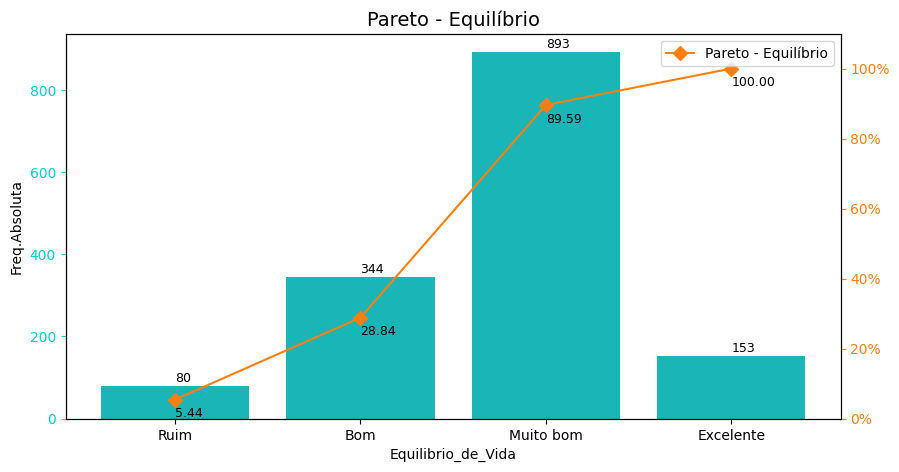

In [19]:
pareto(tabela7,'Equilibrio_de_Vida','Freq.Absoluta','Pareto - Equilíbrio','Freq.Acumulada (%)')

**<center>Análise / Insights</center>**

1. Mais de 94% dos funcionários tem um equilibrio de vida de bom a excelente.
2. Existem informações que apontam o motivo de 5.4% dos funcionários terem um equilíbrio de vida ruim? *(QUESTIONAR ÁREA DE NEGÓCIO)*

<center><h4><font color="darkmagenta">3.3.2 - UNIDIMENSIONAL - NUMÉRICAS</font></h4></center>

**<center><font color="darkorchid">VARIÁVEL: Idade</font></center>**

**<center>Tabela de Frequências</center>**

In [20]:
# Agrupamento 

faixa = np.arange(df_rh['Idade'].min(), df_rh['Idade'].max()+1, 5)

idade = pd.cut(df_rh['Idade'], bins=faixa)

# Calculando as Frequências

df_freq_idade = freq_num('Idade',idade,'Faixa Etária')

df_freq_idade

,Faixa Etária,Freq.Absoluta,Freq.Relativa (%),Freq.Acumulada (%)
0,"(18, 23]",63,4.35,4.35
1,"(23, 28]",187,12.92,17.27
2,"(28, 33]",316,21.84,39.11
3,"(33, 38]",332,22.94,62.05
4,"(38, 43]",217,15.00,77.05
5,"(43, 48]",150,10.37,87.42
6,"(48, 53]",110,7.60,95.02
7,"(53, 58]",72,4.98,100.00


**<center>Distribuição dos dados da variável</center>**

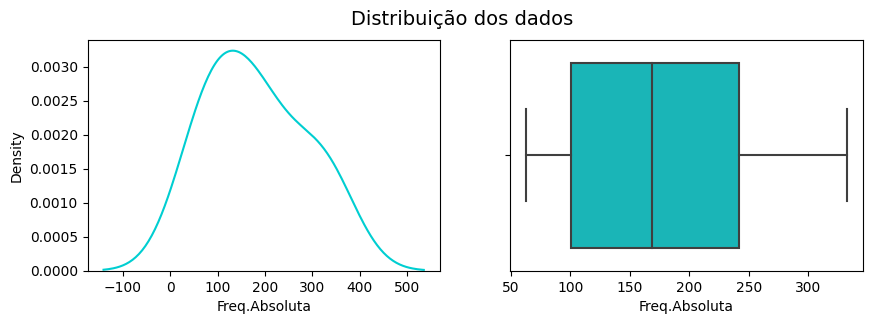

In [21]:
distribuicao(df_freq_idade)

**<center>Tabela de Medidas</center>**

In [22]:
tabela8 = medidas_numericas('Idade')

tabela8

,Contagem,Média,Mediana,Moda,Variância,Desvio Padrão,IQR,1º Quartil,2º Quartil,3º Quartil,Assimetria,Curtose,Mínimo,Valor Máximo
Idade,1470,37,36,35,83,9,13,30,36,43,0,0,18,60


**<center>Gráfico</center>**

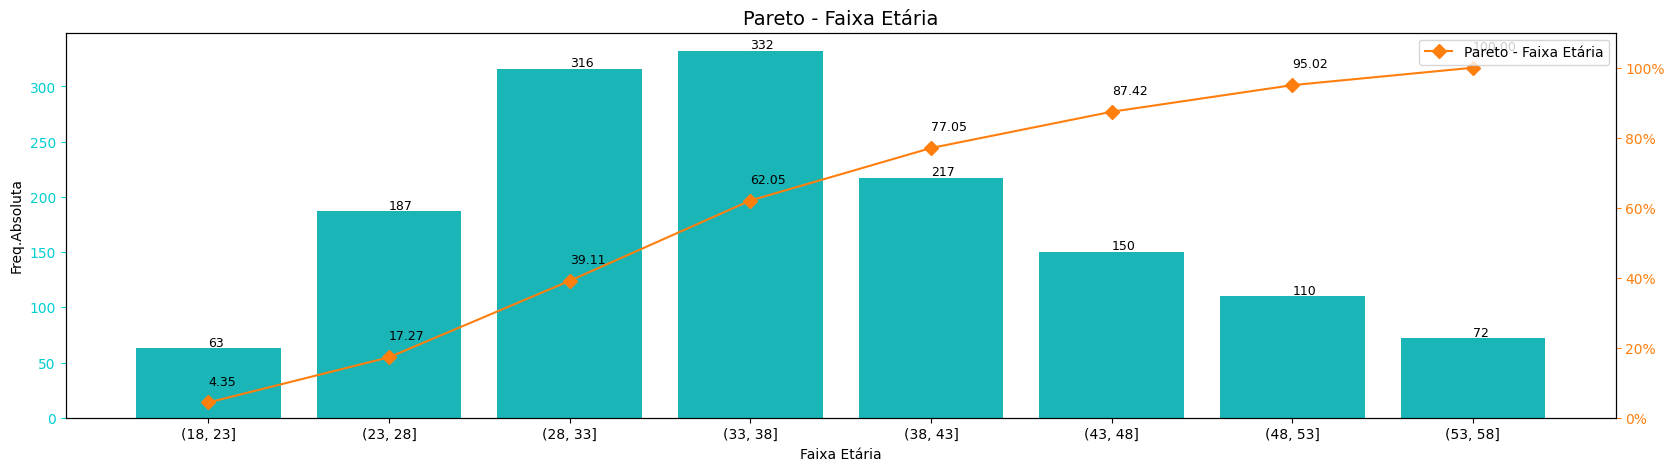

In [23]:
pareto_num(df_freq_idade,'Faixa Etária','Freq.Absoluta','Pareto - Faixa Etária','Freq.Acumulada (%)',2,5)

**<center>Análise / Insights</center>**

1. 50% dos funcionários tem até 37 anos de idade.
2. Pode-se observar que os dados estão bem distribuídos.
3. Pode-se observar que mais 87% do quadro de funcionários estão entre 18 e 48 anos de idade.
4. A maioria dos funcionários estão entre 33 e 37 anos (mais de 22%).
5. Apenas 5% dos funcionários estão acima de 53 anos de idade.

**<center><font color="darkorchid">VARIÁVEL: Distância_do_trabalho</font></center>**

**<center>Tabela de Frequências</center>**

In [24]:
# Agrupamento 

faixa = np.arange(df_rh['Distância_do_trabalho'].min(), df_rh['Distância_do_trabalho'].max()+1, 5)

distancia = pd.cut(df_rh['Distância_do_trabalho'], bins=faixa)

# Calculando as Frequências

df_freq_distancia = freq_num('Distância_do_trabalho',distancia,'Distância (km)')

df_freq_distancia

,Distância (km),Freq.Absoluta,Freq.Relativa (%),Freq.Acumulada (%)
0,"(1, 6]",483,40.25,40.25
1,"(6, 11]",364,30.33,70.58
2,"(11, 16]",118,9.83,80.41
3,"(16, 21]",111,9.25,89.66
4,"(21, 26]",124,10.33,99.99


**<center>Distribuição dos dados da variável</center>**

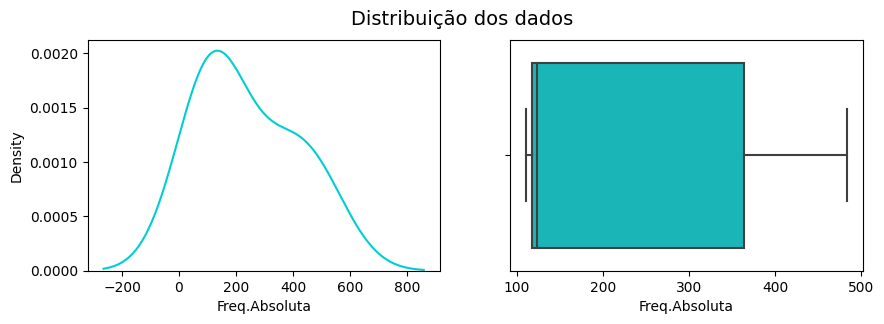

In [25]:
distribuicao(df_freq_distancia)

**<center>Tabela de Medidas</center>**

In [26]:
tabela9 = medidas_numericas('Distância_do_trabalho',2)

tabela9

,Contagem,Média,Mediana,Moda,Variância,Desvio Padrão,IQR,1º Quartil,2º Quartil,3º Quartil,Assimetria,Curtose,Mínimo,Valor Máximo
Distância_do_trabalho,1470,9.19,7.0,2,65.72,8.11,12.0,2.0,7.0,14.0,0.96,-0.22,1,29


**<center>Gráfico</center>**

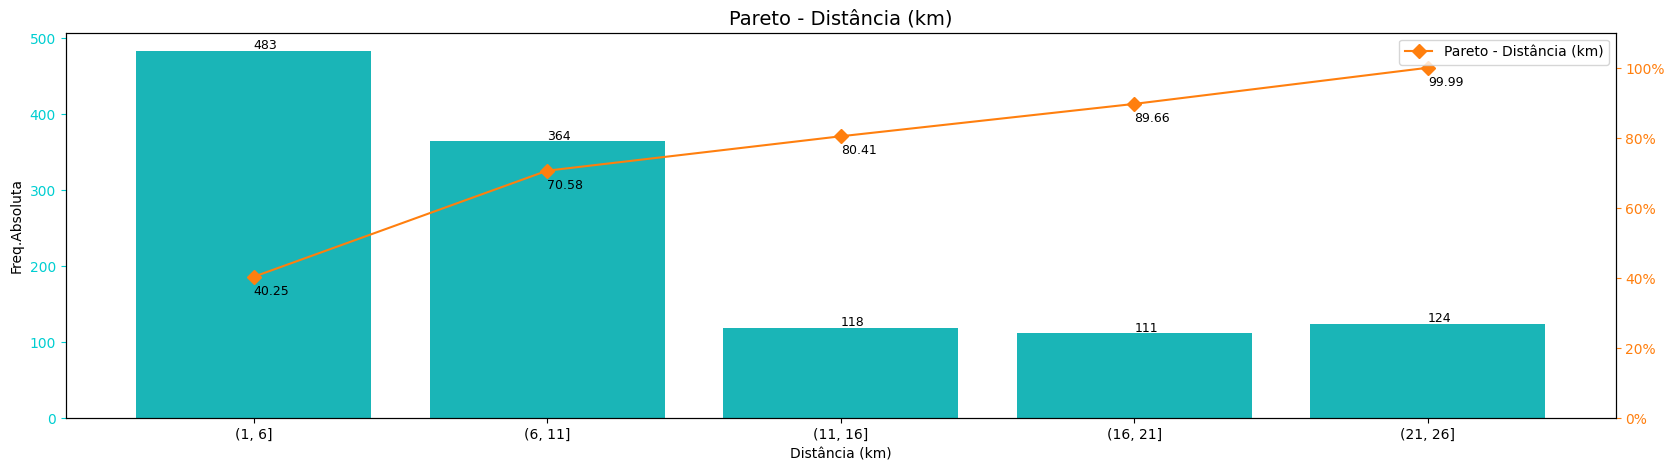

In [27]:
pareto_num(df_freq_distancia,'Distância (km)','Freq.Absoluta','Pareto - Distância (km)','Freq.Acumulada (%)',3,-5)

**Análise / Insights**

1. Pode-se observar pela distribuição dos dados que a maioria dos funcionários moram bem próximos a empresa e (de 1 até 10 km).
2. Existe uma grande dispersão de funcionários que moram acima de 10 km de distância. Essa comprovação pode ser melhor visualizada com o gráfico de Pareto, onde pode-se observar que mais de 70% mora até 10 km de distância da empresa.

**<center><font color="darkorchid">VARIÁVEL: Salário</font></center>**

**<center>Tabela de Frequências</center>**

In [28]:
# Agrupamento 

salario = pd.cut(df_rh['Salário'], bins=np.arange(df_rh['Salário'].min(), df_rh['Salário'].max()+1, 1500))

# Calculando as Frequências

df_freq_salario = freq_num('Salário',salario,'Faixa Salarial')

df_freq_salario

,Faixa Salarial,Freq.Absoluta,Freq.Relativa (%),Freq.Acumulada (%)
0,"(1009, 2509]",227,16.00,16.00
1,"(2509, 4009]",316,22.27,38.27
2,"(4009, 5509]",311,21.92,60.19
3,"(5509, 7009]",181,12.76,72.95
4,"(7009, 8509]",75,5.29,78.24
5,"(8509, 10009]",79,5.57,83.81
6,"(10009, 11509]",71,5.00,88.81
7,"(11509, 13009]",24,1.69,90.50
8,"(13009, 14509]",48,3.38,93.88
9,"(14509, 16009]",11,0.78,94.66


**<center>Distribuição dos dados da variável</center>**

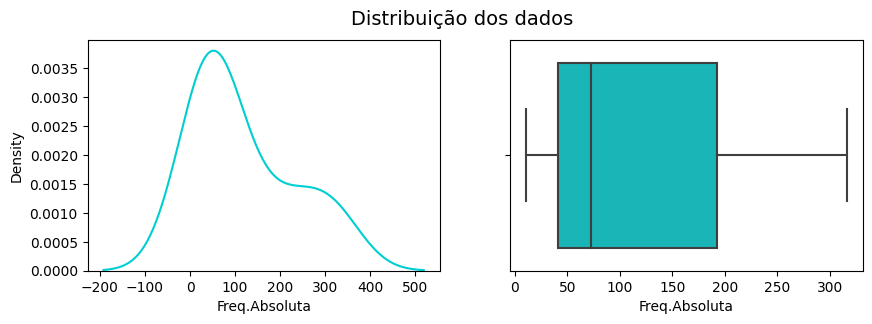

In [29]:
distribuicao(df_freq_salario)

**<center>Tabela Medidas</center>**

In [30]:
tabela10 = medidas_numericas('Salário',2)

tabela10

,Contagem,Média,Mediana,Moda,Variância,Desvio Padrão,IQR,1º Quartil,2º Quartil,3º Quartil,Assimetria,Curtose,Mínimo,Valor Máximo
Salário,1470,6502.93,4919.0,2342,22164857.07,4707.96,5468.0,2911.0,4919.0,8379.0,1.37,1.01,1009,19999


**<center>Gráfico</center>**

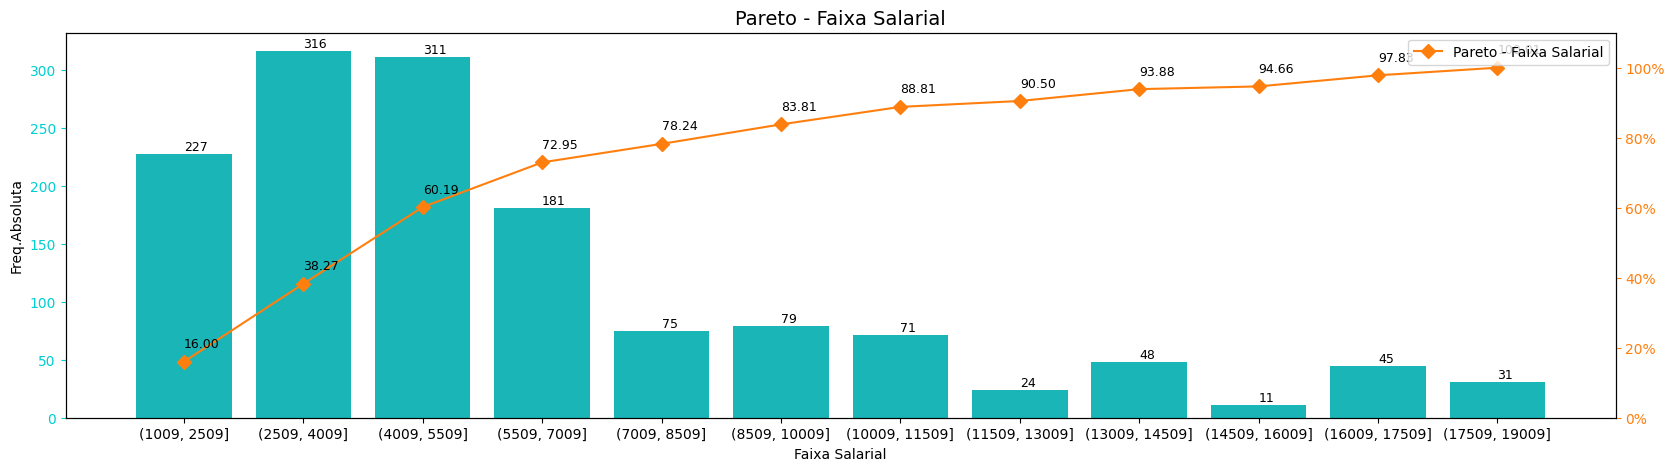

In [31]:
pareto_num(df_freq_salario,'Faixa Salarial','Freq.Absoluta','Pareto - Faixa Salarial','Freq.Acumulada (%)',3,4)

**<center>Análise / Insights</center>**

1. Mais de 80% dos funcionários ganham até 10.000,00.
2. A maioria ganha entre 2.500,00 e 5.500,00.
3. Existem políticas de carreira dentro da empresa que dê oportunidade de crescimento profissional e salarial? *(QUESTIONAR ÁREA DE NEGÓCIO)*
4. Será que os mais jovens ganham menores salários?
6. Será que os mais jovens é que ganham os menores salários por estarem iniciando na carreira?

**<center><font color="darkorchid">VARIÁVEL: Qte_Empresas_Trabalhadas</font></center>**

**<center>Tabela de Frequências</center>**

In [32]:
# Agrupamento 

empresas = pd.cut(df_rh['Qte_Empresas_Trabalhadas'], bins=np.arange(df_rh['Qte_Empresas_Trabalhadas'].min(), 
                                                                    df_rh['Qte_Empresas_Trabalhadas'].max()+1, 1))

# Calculando as Frequências

df_freq_empresas = freq_num('Qte_Empresas_Trabalhadas',empresas,'Quantidade')

df_freq_empresas

,Quantidade,Freq.Absoluta,Freq.Relativa (%),Freq.Acumulada (%)
0,"(0, 1]",521,40.93,40.93
1,"(1, 2]",146,11.47,52.40
2,"(2, 3]",159,12.49,64.89
3,"(3, 4]",139,10.92,75.81
4,"(4, 5]",63,4.95,80.76
5,"(5, 6]",70,5.50,86.26
6,"(6, 7]",74,5.81,92.07
7,"(7, 8]",49,3.85,95.92
8,"(8, 9]",52,4.08,100.00


**<center>Distribuição dos dados da variável</center>**

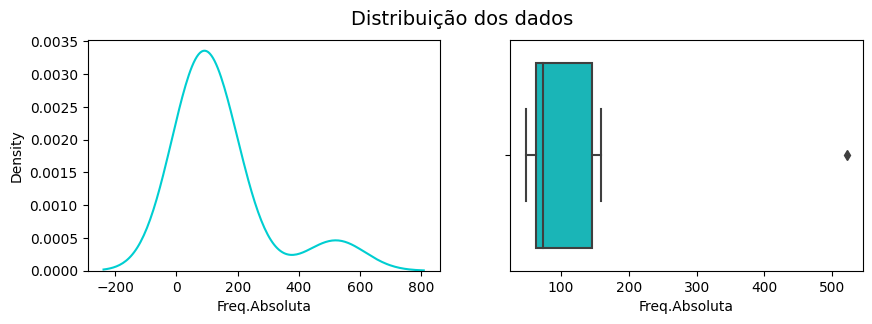

In [33]:
distribuicao(df_freq_empresas)

**<center>Tabelas de Medidas</center>**

In [34]:
tabela11 = medidas_numericas('Qte_Empresas_Trabalhadas')

tabela11

,Contagem,Média,Mediana,Moda,Variância,Desvio Padrão,IQR,1º Quartil,2º Quartil,3º Quartil,Assimetria,Curtose,Mínimo,Valor Máximo
Qte_Empresas_Trabalhadas,1470,3,2,1,6,2,3,1,2,4,1,0,0,9


**<center>Gráfico</center>**

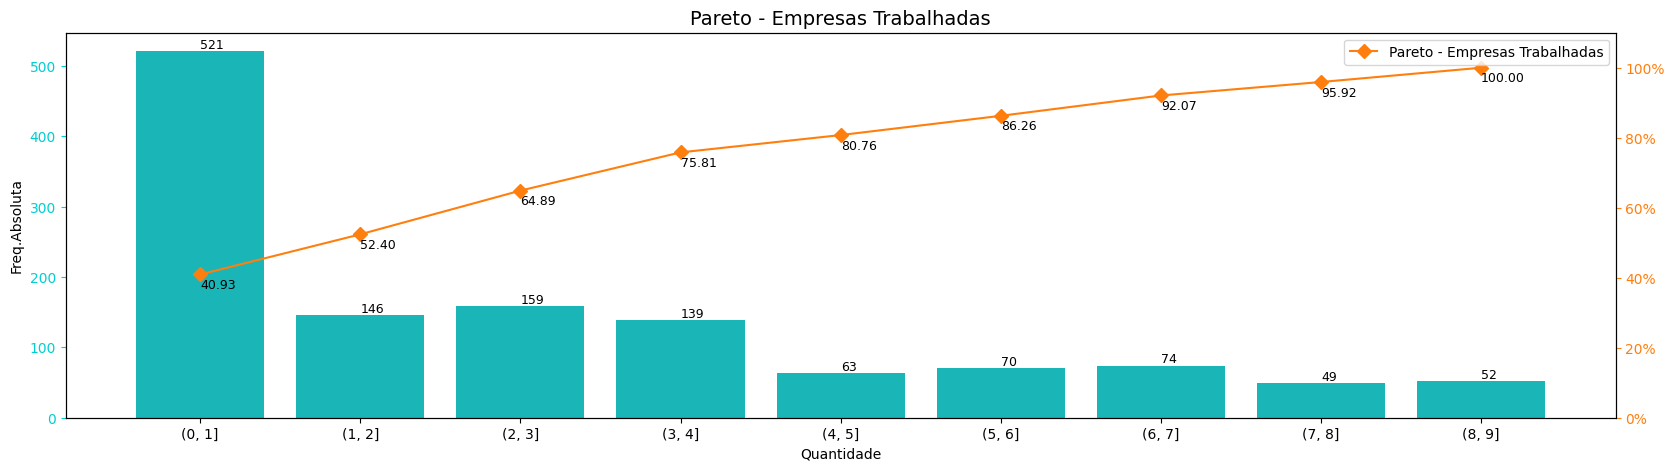

In [35]:
pareto_num(df_freq_empresas,'Quantidade','Freq.Absoluta','Pareto - Empresas Trabalhadas','Freq.Acumulada (%)',4,-4)

**Análise / Insights**

1. Apesar de ser uma base aparentemente mais jovem, pode-se observar que mais de 80% dos funcionários já trabalharam em até 5 empresas.
2. Mais de 40% dos funcionários trabalharam em apenas 1 empresa antes.
3. 19% dos funcionários já trabalharam de 6 até 9 empresas anteriormente.

**<center><font color="darkorchid">VARIÁVEL: Perc_de_aumento</font></center>**

**<center>Tabela de Frequências</center>**

In [36]:
# Agrupamento 

aumento = pd.cut(df_rh['Perc_de_aumento'], bins=np.arange(df_rh['Perc_de_aumento'].min(), 
                                                          df_rh['Perc_de_aumento'].max()+1, 1))

# Calculando as Frequências

df_freq_aumento = freq_num('Perc_de_aumento',aumento,'Faixa %')

df_freq_aumento

,Faixa %,Freq.Absoluta,Freq.Relativa (%),Freq.Acumulada (%)
0,"(11, 12]",198,15.71,15.71
1,"(12, 13]",209,16.59,32.30
2,"(13, 14]",201,15.95,48.25
3,"(14, 15]",101,8.02,56.27
4,"(15, 16]",78,6.19,62.46
5,"(16, 17]",82,6.51,68.97
6,"(17, 18]",89,7.06,76.03
7,"(18, 19]",76,6.03,82.06
8,"(19, 20]",55,4.37,86.43
9,"(20, 21]",48,3.81,90.24


**<center>Distribuição dos dados da variável</center>**

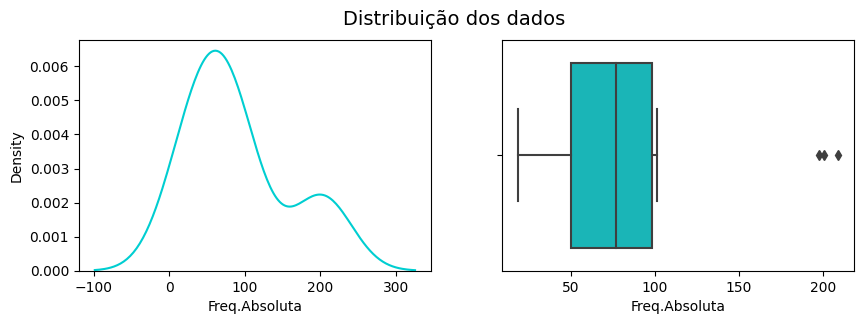

In [37]:
distribuicao(df_freq_aumento)

**<center>Tabela de Medidas</center>**

In [38]:
tabela12 = medidas_numericas('Perc_de_aumento',2)

tabela12

,Contagem,Média,Mediana,Moda,Variância,Desvio Padrão,IQR,1º Quartil,2º Quartil,3º Quartil,Assimetria,Curtose,Mínimo,Valor Máximo
Perc_de_aumento,1470,15.21,14.0,11,13.4,3.66,6.0,12.0,14.0,18.0,0.82,-0.3,11,25


**Gráfico**

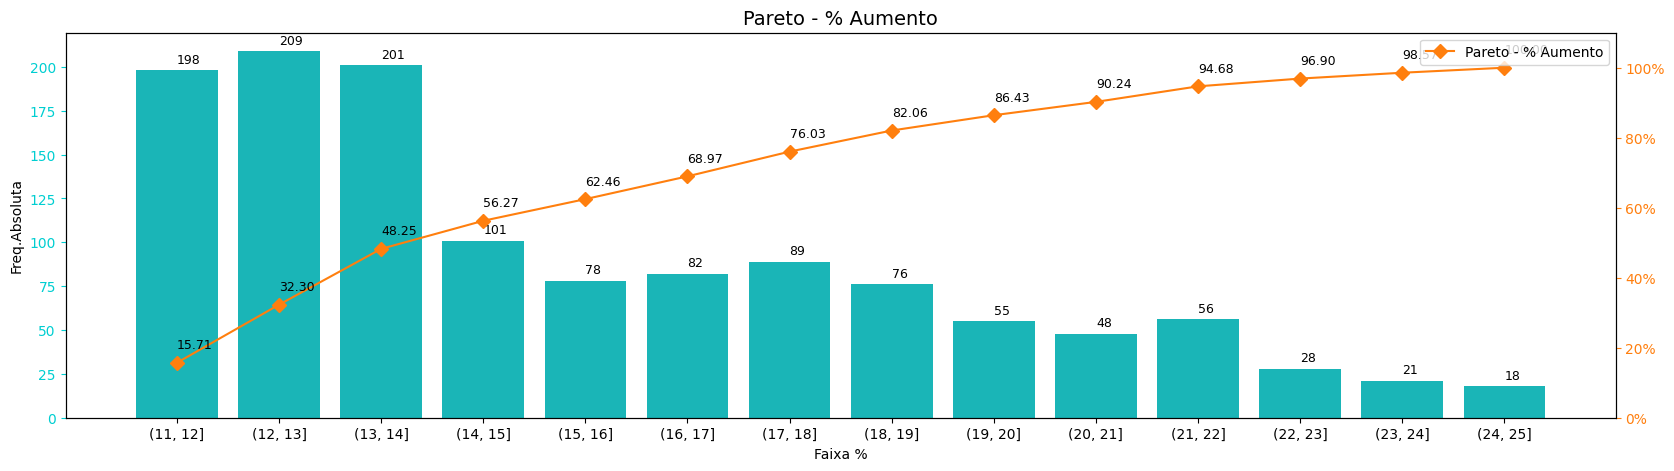

In [39]:
pareto_num(df_freq_aumento,'Faixa %','Freq.Absoluta','Pareto - % Aumento','Freq.Acumulada (%)',4,4)

**<center>Análise / Insights</center>**

1. 25% dos funcionários receberam 12% de aumento.
2. Em média os funcionários receberam 15% de aumento.

**<center><font color="darkorchid">VARIÁVEL: Qte_ações_da_empresa</font></center>**

**<center>Tabela de Frequências</center>**

In [40]:
# Agrupamento 

acoes = pd.cut(df_rh['Qte_ações_da_empresa'], bins=np.arange(df_rh['Qte_ações_da_empresa'].min(), 
                                                             df_rh['Qte_ações_da_empresa'].max()+1, 1))


# Calculando as Frequências

df_freq_acoes = freq_num('Qte_ações_da_empresa',acoes,'Ações')

df_freq_acoes

,Ações,Freq.Absoluta,Freq.Relativa (%),Freq.Acumulada (%)
0,"(0, 1]",596,71.04,71.04
1,"(1, 2]",158,18.83,89.87
2,"(2, 3]",85,10.13,100.00


**<center>Distribuição dos dados da variável</center>**

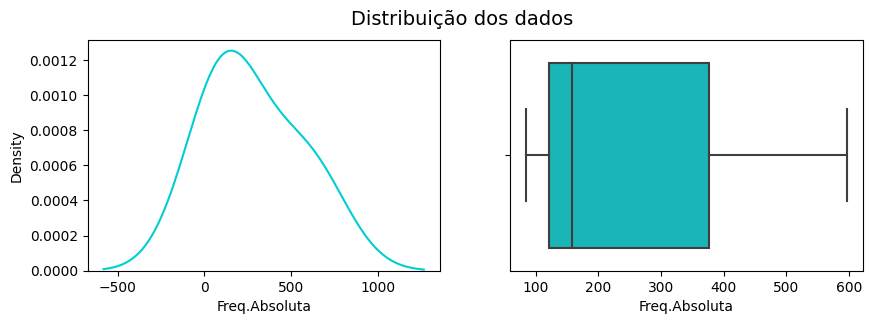

In [41]:
distribuicao(df_freq_acoes)

**<center>Tabelas de Medidas</center>**

In [42]:
tabela13 = medidas_numericas('Qte_ações_da_empresa')

tabela13

,Contagem,Média,Mediana,Moda,Variância,Desvio Padrão,IQR,1º Quartil,2º Quartil,3º Quartil,Assimetria,Curtose,Mínimo,Valor Máximo
Qte_ações_da_empresa,1470,1,1,0,1,1,1,0,1,1,1,0,0,3


**<center>Gráfico</center>**

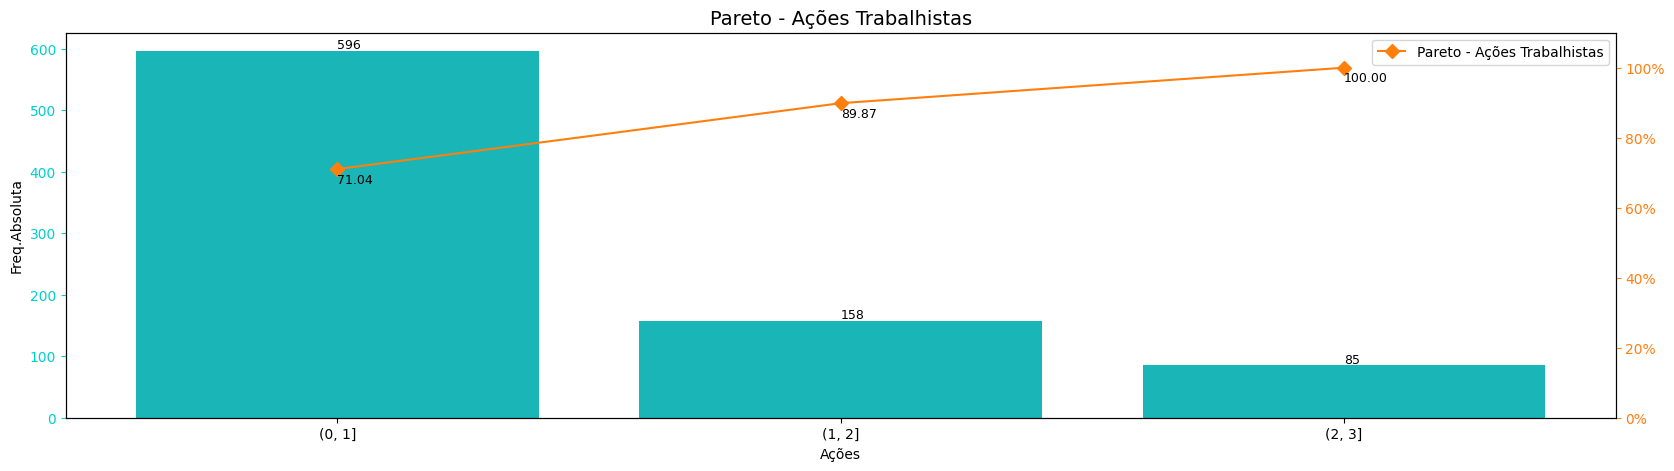

In [43]:
pareto_num(df_freq_acoes,'Ações','Freq.Absoluta','Pareto - Ações Trabalhistas','Freq.Acumulada (%)',4,-4)

**<center>Análise / Insights</center>**

1. Pode-se observar que a empresa tem poucas ações trabalhistas. Isso confirma o alto índice de satisfação para com a empresa.
2. Talvez as poucas ações trabalhistas estejam relacionadas com o TurnOver.
3. Qual o motivo das ações trabalhistas. *QUESTIONAR A ÁREA DE NEGÓCIOS*

**<center><font color="darkorchid">VARIÁVEL: Tempo_de_carreira</font></center>**

**<center>Tabela de Frequências</center>**

In [44]:
# Agrupamento 

tempo = pd.cut(df_rh['Tempo_de_carreira'], bins=np.arange(df_rh['Tempo_de_carreira'].min(), 
                                                          df_rh['Tempo_de_carreira'].max()+1, 5))

# Calculando as Frequências

df_freq_tempo = freq_num('Tempo_de_carreira',tempo,'Faixa de Tempo (Anos)')

df_freq_tempo

,Faixa de Tempo (Anos),Freq.Absoluta,Freq.Relativa (%),Freq.Acumulada (%)
0,"(0, 5]",305,20.90,20.90
1,"(5, 10]",607,41.60,62.50
2,"(10, 15]",191,13.09,75.59
3,"(15, 20]",149,10.21,85.80
4,"(20, 25]",109,7.47,93.27
5,"(25, 30]",52,3.56,96.83
6,"(30, 35]",33,2.26,99.09
7,"(35, 40]",13,0.89,99.98


**<center>Distribuição dos dados da variável</center>**

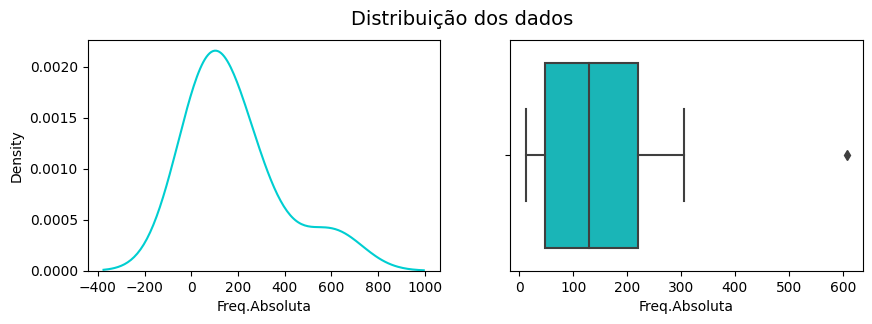

In [45]:
distribuicao(df_freq_tempo)

**<center>Tabela de Medidas</center>**

In [46]:
tabela14 = medidas_numericas('Tempo_de_carreira')

tabela14

,Contagem,Média,Mediana,Moda,Variância,Desvio Padrão,IQR,1º Quartil,2º Quartil,3º Quartil,Assimetria,Curtose,Mínimo,Valor Máximo
Tempo_de_carreira,1470,11,10,10,61,8,9,6,10,15,1,1,0,40


**<center>Gráfico</center>**

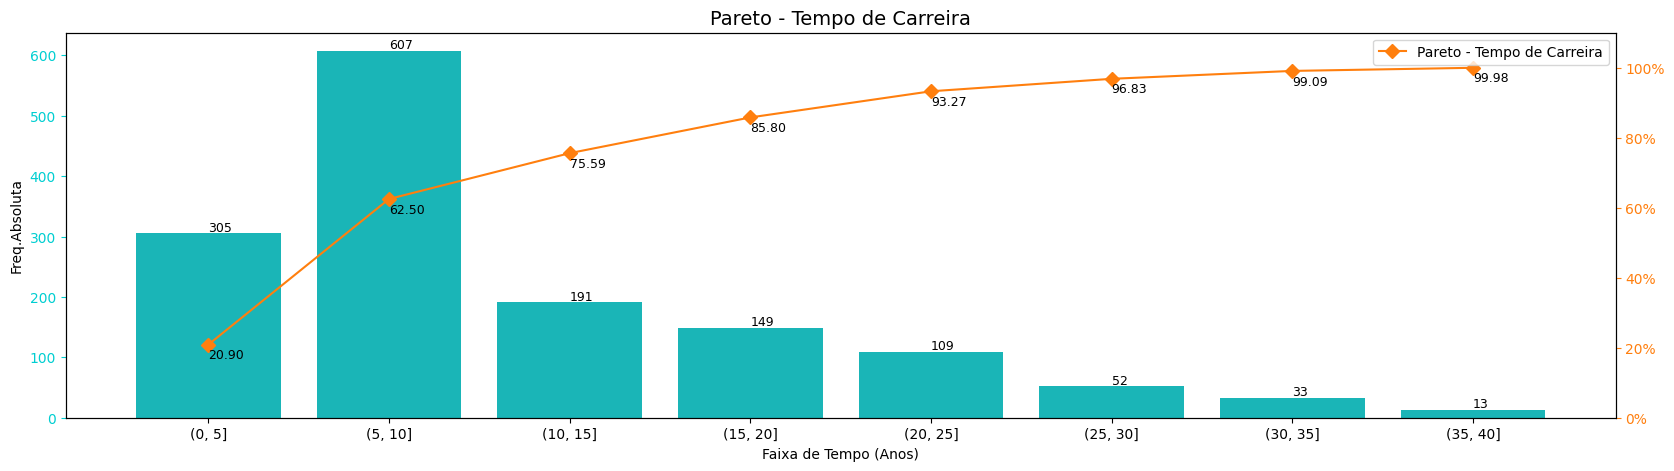

In [47]:
pareto_num(df_freq_tempo,'Faixa de Tempo (Anos)','Freq.Absoluta','Pareto - Tempo de Carreira','Freq.Acumulada (%)',4,-4)

**<center>Análise / Insights</center>**

1. Mais de 60% de funcionários estão no mesmo cargo a pelo menos 10 anos.
2. Estes mesmos funcinários que estão a tanto tempo na carreira estão satisfeitos? 
3. A empresa tem alguma política de plano de carreira? *QUESTIONAR ÁREA DE NEGÓCIOS*

**<center><font color="darkorchid">VARIÁVEL: Horas_de_treinamento</font><center>**

**<center>Tabela de Frequências</center>**

In [48]:
# Agrupamento 

treinamento = pd.cut(df_rh['Horas_de_treinamento'], bins=np.arange(df_rh['Horas_de_treinamento'].min(), 
                                                                   df_rh['Horas_de_treinamento'].max()+1, 1))

# Calculando as Frequências

df_freq_treinamento = freq_num('Horas_de_treinamento',treinamento,'Faixa de Horas de Treinamento')

df_freq_treinamento

,Faixa de Horas de Treinamento,Freq.Absoluta,Freq.Relativa (%),Freq.Acumulada (%)
0,"(0, 1]",71,5.01,5.01
1,"(1, 2]",547,38.63,43.64
2,"(2, 3]",491,34.68,78.32
3,"(3, 4]",123,8.69,87.01
4,"(4, 5]",119,8.40,95.41
5,"(5, 6]",65,4.59,100.00


**<center>Distribuição dos dados da variável</center>**

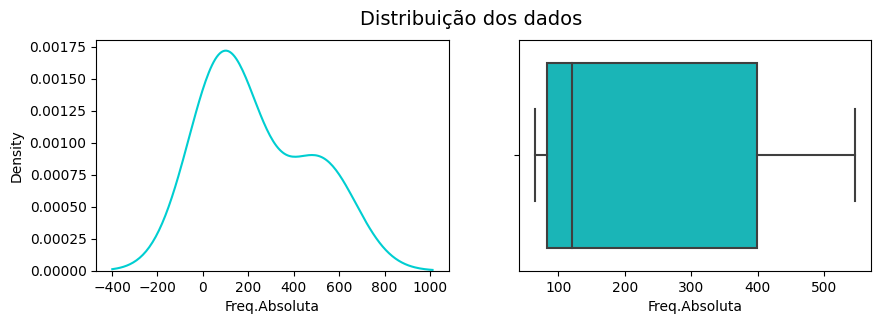

In [49]:
distribuicao(df_freq_treinamento)

**<center>Tabela de Medidas</center>**

In [50]:
tabela15 = medidas_numericas('Horas_de_treinamento',2)

tabela15

,Contagem,Média,Mediana,Moda,Variância,Desvio Padrão,IQR,1º Quartil,2º Quartil,3º Quartil,Assimetria,Curtose,Mínimo,Valor Máximo
Horas_de_treinamento,1470,2.8,3.0,2,1.66,1.29,1.0,2.0,3.0,3.0,0.55,0.49,0,6


**<center>Gráfico</center>**

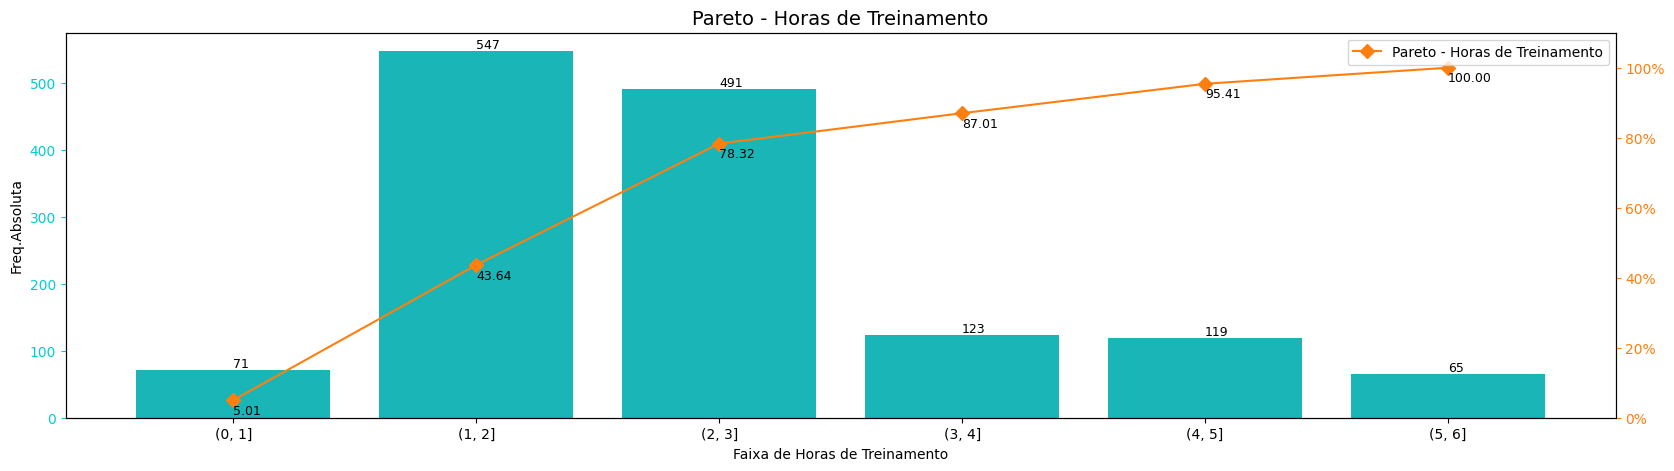

In [51]:
pareto_num(df_freq_treinamento,'Faixa de Horas de Treinamento','Freq.Absoluta','Pareto - Horas de Treinamento','Freq.Acumulada (%)',4,-4)

**<center>Análise / Insights</center>**

1. Devido ao tempo de treinamento ser muito curto, mais de 78% até 3 horas, verificar se realmente trata-se de treinamento ou trata-se de palestras ou workshops. *QUESTIONAR ÁREA DE NEGÓCIO*

**<center><font color="darkorchid">VARIÁVEL: Tempo_de_empresa</font></center>**

**<center>Tabela de Frequências</center>**

In [52]:
# Agrupamento 

tempo_empresa = pd.cut(df_rh['Tempo_de_empresa'], bins=np.arange(df_rh['Tempo_de_empresa'].min(), 
                                                               df_rh['Tempo_de_empresa'].max()+1, 5))

# Calculando as Frequências

df_freq_tempo_empresa = freq_num('Tempo_de_empresa',tempo_empresa,'Faixa de Tempo de Empresa')

df_freq_tempo_empresa

,Faixa de Tempo de Empresa,Freq.Absoluta,Freq.Relativa (%),Freq.Acumulada (%)
0,"(0, 5]",732,51.33,51.33
1,"(5, 10]",448,31.42,82.75
2,"(10, 15]",108,7.57,90.32
3,"(15, 20]",72,5.05,95.37
4,"(20, 25]",41,2.88,98.25
5,"(25, 30]",9,0.63,98.88
6,"(30, 35]",12,0.84,99.72
7,"(35, 40]",4,0.28,100.00


**<center>Distribuição dos dados da variável</center>**

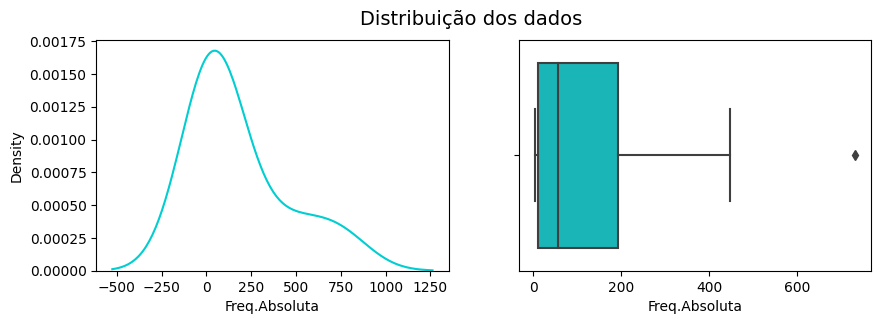

In [53]:
distribuicao(df_freq_tempo_empresa)

**<center>Tabela de Medidas</center>**

In [54]:
tabela16 = medidas_numericas('Tempo_de_empresa')

tabela16

,Contagem,Média,Mediana,Moda,Variância,Desvio Padrão,IQR,1º Quartil,2º Quartil,3º Quartil,Assimetria,Curtose,Mínimo,Valor Máximo
Tempo_de_empresa,1470,7,5,5,38,6,6,3,5,9,2,4,0,40


**<center>Gráfico</center>**

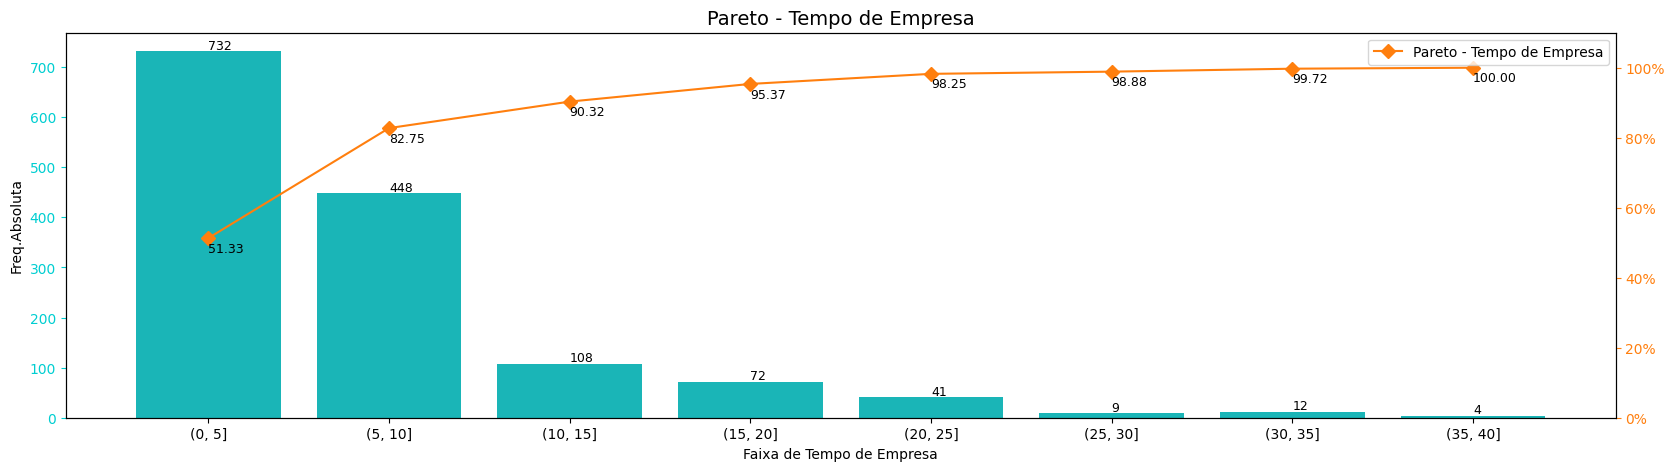

In [55]:
pareto_num(df_freq_tempo_empresa,'Faixa de Tempo de Empresa','Freq.Absoluta','Pareto - Tempo de Empresa','Freq.Acumulada (%)',4,-4)

**<center>Análise / Insights</center>**

1. Mais de 80% dos funcionários permanecem na empresa por até 9 anos.
2. Metade permanecem por 4 anos ou menos.

**<center><font color="darkorchid">VARIÁVEL: Anos_no_mesmo_cargo</font></center>**

**<center>Tabela de Frequências</center>**

In [56]:
# Agrupamento 

cargo = pd.cut(df_rh['Anos_no_mesmo_cargo'], bins=np.arange(df_rh['Anos_no_mesmo_cargo'].min(), 
                                                                  df_rh['Anos_no_mesmo_cargo'].max()+1, 5))

# Calculando as Frequências

df_freq_cargo = freq_num('Anos_no_mesmo_cargo',cargo,'Faixa de Anos')

df_freq_cargo

,Faixa de Anos,Freq.Absoluta,Freq.Relativa (%),Freq.Acumulada (%)
0,"(0, 5]",704,58.04,58.04
1,"(5, 10]",444,36.60,94.64
2,"(10, 15]",65,5.36,100.00


**<center>Distribuição dos dados da variável</center>**

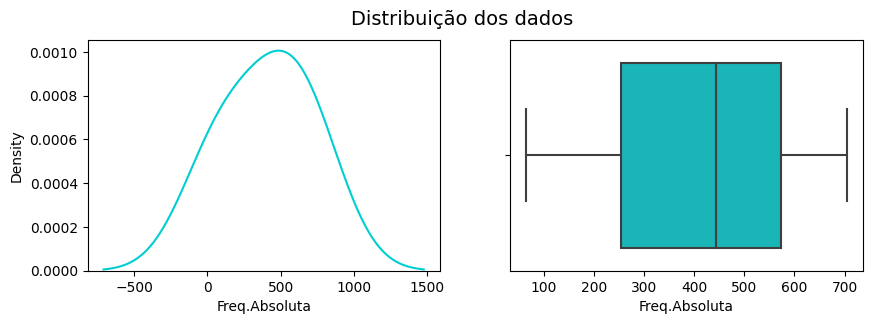

In [57]:
distribuicao(df_freq_cargo)

**<center>Tabela de Medidas</center>**

In [58]:
tabela17 = medidas_numericas('Anos_no_mesmo_cargo')

tabela17

,Contagem,Média,Mediana,Moda,Variância,Desvio Padrão,IQR,1º Quartil,2º Quartil,3º Quartil,Assimetria,Curtose,Mínimo,Valor Máximo
Anos_no_mesmo_cargo,1470,4,3,2,13,4,5,2,3,7,1,0,0,18


**<center>Gráfico</center>**

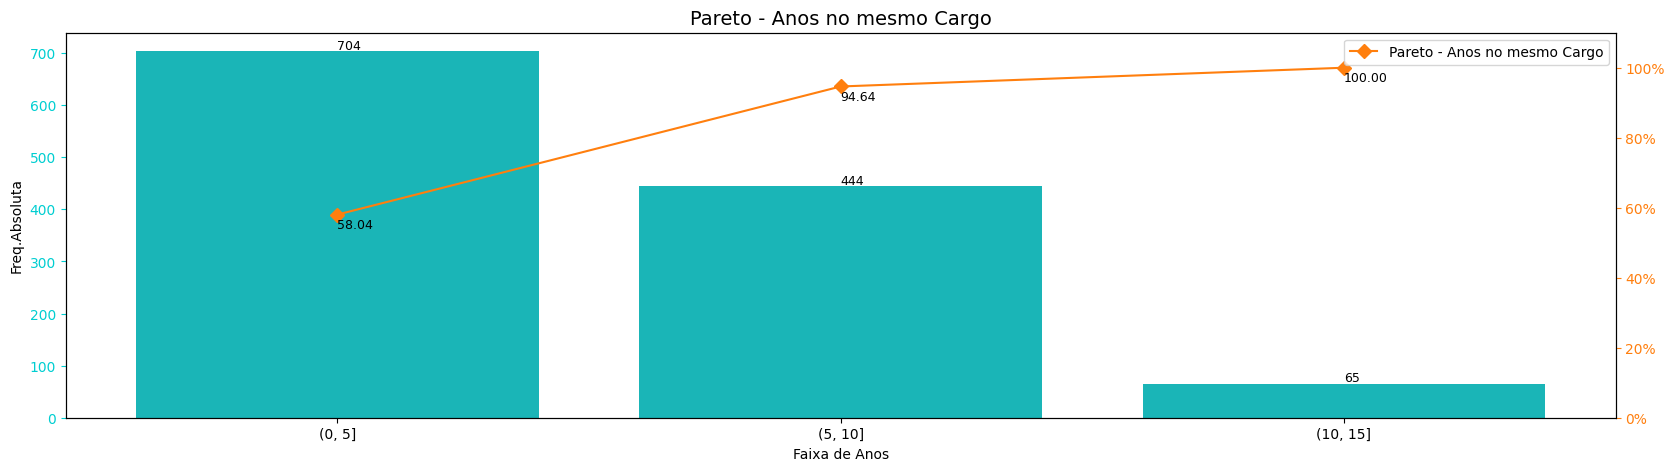

In [59]:
pareto_num(df_freq_cargo,'Faixa de Anos','Freq.Absoluta','Pareto - Anos no mesmo Cargo','Freq.Acumulada (%)',4,-4)

**<center>Análise / Insights**</center>

1. A grande maioria permanece no mesmo cargo em média por 4 anos.
2. Será que estes que permanecem até 4 anos estão contribuindo para o TurnOver?
3. O RH possui alguma política de retenção de talentos? É mais custoso contratar novos funcionários do que reter os existentes.

**<center><font color="darkorchid">VARIÁVEL: Anos_desde_a_ultima_promocao</font></center>**

**<center>Tabela de Frequências</center>**

In [60]:
# Agrupamento 

promocao = pd.cut(df_rh['Anos_desde_a_ultima_promocao'], bins=np.arange(df_rh['Anos_desde_a_ultima_promocao'].min(), 
                                                                        df_rh['Anos_desde_a_ultima_promocao'].max()+1, 5))

# Calculando as Frequências

df_freq_promocao = freq_num('Anos_desde_a_ultima_promocao',promocao,'Anos sem Promoção')

df_freq_promocao

,Anos sem Promoção,Freq.Absoluta,Freq.Relativa (%),Freq.Acumulada (%)
0,"(0, 5]",674,75.82,75.82
1,"(5, 10]",149,16.76,92.58
2,"(10, 15]",66,7.42,100.00


**<center>Distribuição dos dados da variável</center>**

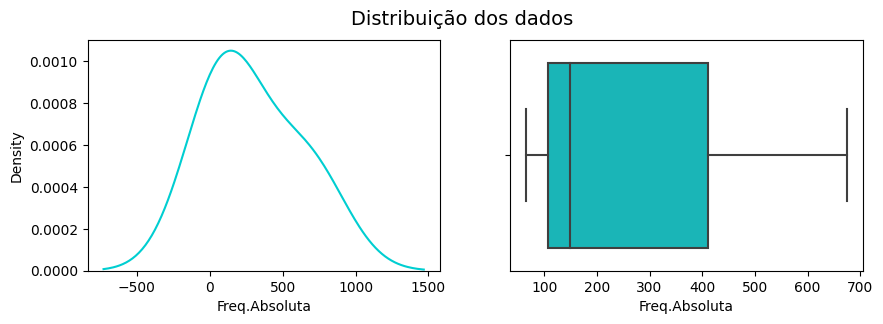

In [61]:
distribuicao(df_freq_promocao)

**<center>Tabela de Medidas</center>**

In [62]:
tabela18 = medidas_numericas('Anos_desde_a_ultima_promocao',2)

tabela18

,Contagem,Média,Mediana,Moda,Variância,Desvio Padrão,IQR,1º Quartil,2º Quartil,3º Quartil,Assimetria,Curtose,Mínimo,Valor Máximo
Anos_desde_a_ultima_promocao,1470,2.19,1.0,0,10.38,3.22,3.0,0.0,1.0,3.0,1.98,3.61,0,15


**<center>Gráficos</center>**

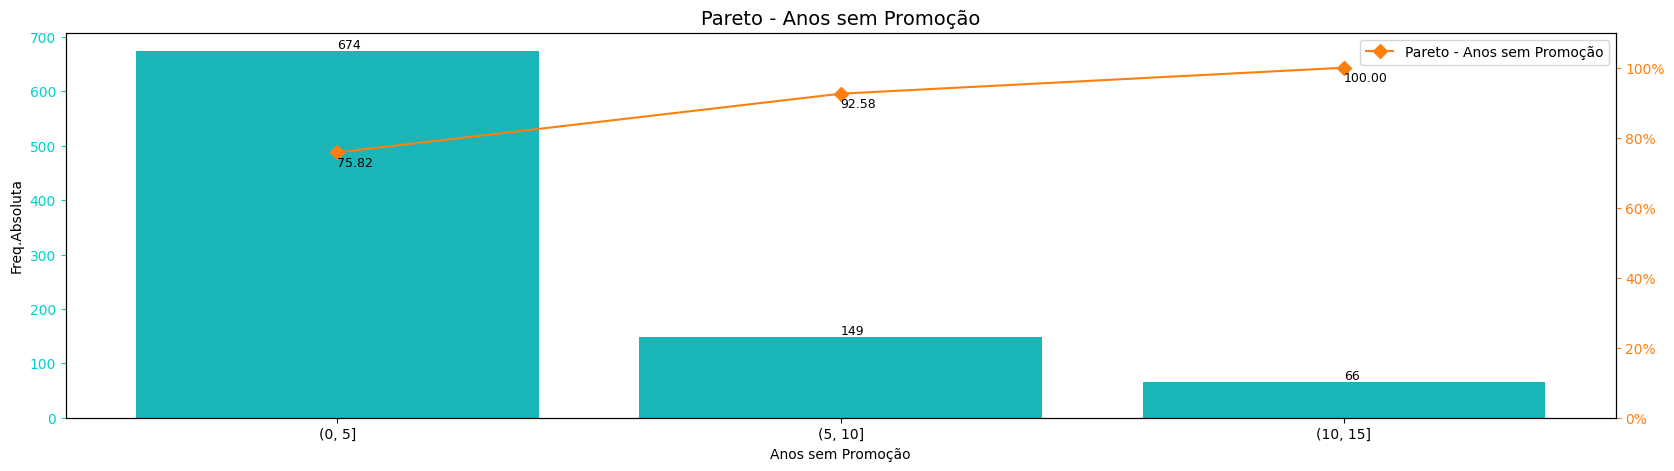

In [63]:
pareto_num(df_freq_promocao,'Anos sem Promoção','Freq.Absoluta','Pareto - Anos sem Promoção','Freq.Acumulada (%)',4,-4)

**<center>Análise / Insights</center>**

1. Mais de 75% dos funcionários estão até 5 anos sem nenhuma promoção.
2. Os funcionários estão em média há 2 anos sem promoção.
3. O RH possui alguma política de avaliação de cargos. *QUESTIONAR ÁREA DE NEGÓCIO*
4. Quais os cargos que estão sem promoção? *QUESTIONAR ÁREA DE NEGÓCIO*
5. Será que os 24% de funcionários que estão a mais de 5 anos sem promoção estão satisfeitos?

**<center><font color="darkorchid">VARIÁVEL: Anos_com_o_mesmo_chefe</font></center>**

**<center>Tabela de Frequências</center>**

In [64]:
# Agrupamento 

mesmo_chefe = pd.cut(df_rh['Anos_com_o_mesmo_chefe'], bins=np.arange(df_rh['Anos_com_o_mesmo_chefe'].min(), 
                                                                     df_rh['Anos_com_o_mesmo_chefe'].max()+1, 5))

# Calculando as Frequências

df_freq_mesmo_chefe = freq_num('Anos_com_o_mesmo_chefe',mesmo_chefe,'Anos com mesmo chefe')

df_freq_mesmo_chefe

,Anos com mesmo chefe,Freq.Absoluta,Freq.Relativa (%),Freq.Acumulada (%)
0,"(0, 5]",691,57.68,57.68
1,"(5, 10]",443,36.98,94.66
2,"(10, 15]",64,5.34,100.00


**<center>Distribuição dos dados da variável</center>**

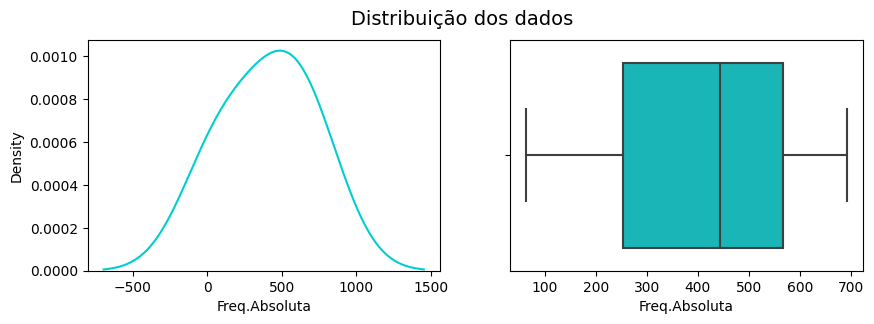

In [65]:
distribuicao(df_freq_mesmo_chefe)

**<center>Tabela de Medidas</center>**

In [66]:
tabela19 = medidas_numericas('Anos_com_o_mesmo_chefe',2)

tabela19

,Contagem,Média,Mediana,Moda,Variância,Desvio Padrão,IQR,1º Quartil,2º Quartil,3º Quartil,Assimetria,Curtose,Mínimo,Valor Máximo
Anos_com_o_mesmo_chefe,1470,4.12,3.0,2,12.73,3.57,5.0,2.0,3.0,7.0,0.83,0.17,0,17


**<center>Gráfico</center>**

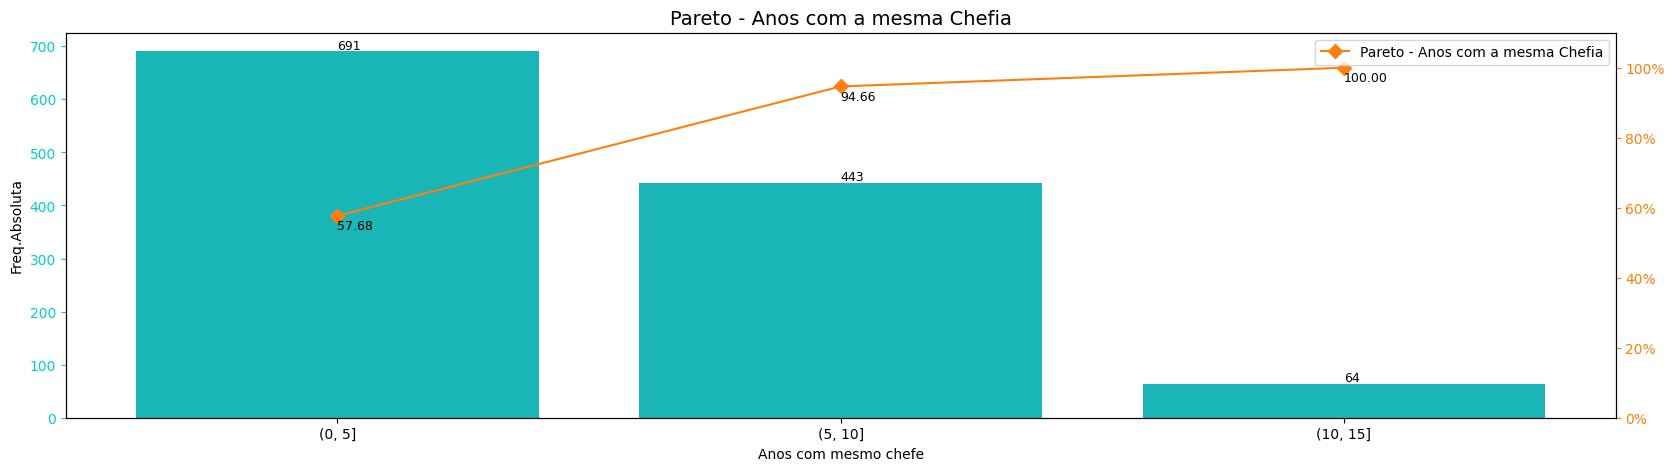

In [67]:
pareto_num(df_freq_mesmo_chefe,'Anos com mesmo chefe','Freq.Absoluta','Pareto - Anos com a mesma Chefia','Freq.Acumulada (%)',4,-4)

**<center>Análise / Insights</center>**

1. A grande maioria (57,68%abs) dos funcionários está a menos de 5 anos com o mesmo chefia. Média de 4 anos.
2. Apenas 5% dos funcionários estão a mais de 10 anos com a mesma chefia.

<center><h4><font color="darkmagenta">3.3.3 - BIDIMENSIONAL</font></h4></center>

A análise bidimensional será realizada baseada na variável bivariada "Funcionário_deixou_a_empresa", pois é está variável que estamos analisando.

Caso haja necessidade de medir a relação entre outras variáveis, esta deverá ser tratada e respondida num segundo momento.

Portanto o foco será analisar a correlação entre todas as outras variáveis e a "Funcionário_deixou_a_empresa".

Aplicaremos a técnica de *Information Value* para verificarmos a força de correlação entre as variáveis.

<h5><center>A Tabela abaixo será utilizada para determinar qual o nível de poder de separação:</center><h5>
<p></p>   

<div align="center">

<img src="InformationValue.png" width=300px >

</div>

**<center><font color="darkorchid">"Funcionário_deixou_a_empresa" X "Frequência de Viagens"</font></center>**

In [68]:
df_iv1 = iv_cat('Frequência de Viagens','Freq.Viagens',ordem1)

df_iv1

,Freq.Viagens,Deixou a empresa? SIM,Deixou a empresa? NÃO,Total,Freq.Relativa,% SIM,% NÃO,% TurnOver,ODDS,IV
0,Não viaja,12,138,150,10.20,5.06,11.19,8.00,0.45,0.049
1,Viaja raramente,156,887,1043,70.95,65.82,71.94,14.96,0.91,0.006
2,Viaja frequentemente,69,208,277,18.84,29.11,16.87,24.91,1.73,0.067


In [108]:
resultado_iv(df_iv1,'Frequência de Viagens')

O IV da variável - "Frequência de Viagens" é de: 0.122 = MÉDIO


**<center><font color="darkorchid">"Funcionário_deixou_a_empresa" X "Formação"</font></center>**

In [70]:
df_iv2 = iv_cat('Formação','Formação',ordem2)

df_iv2

,Formação,Deixou a empresa? SIM,Deixou a empresa? NÃO,Total,Freq.Relativa,% SIM,% NÃO,% TurnOver,ODDS,IV
0,Ensino Médio,31,139,170,11.56,13.08,11.27,18.24,1.16,0.003
1,Ensino Técnico,44,238,282,19.18,18.57,19.30,15.60,0.96,0.000
2,Ensino Superior,99,473,572,38.91,41.77,38.36,17.31,1.09,0.003
3,Mestrado,58,340,398,27.07,24.47,27.58,14.57,0.89,0.004
4,Doutorado,5,43,48,3.27,2.11,3.49,10.42,0.60,0.007


In [109]:
resultado_iv(df_iv2,'Formação')

O IV da variável - "Formação" é de: 0.017 = MUITO FRACO


**<center><font color="darkorchid">"Funcionário_deixou_a_empresa" X "Distância_do_trabalho"</font></center>**

In [72]:
df_iv3 = iv_num('Distância_do_trabalho',5,'Distância (km)')

df_iv3

,Distância (km),Deixou a empresa? SIM,Deixou a empresa? NÃO,Total,Freq.Relativa,% SIM,% NÃO,% TurnOver,ODDS,IV
0,"(1, 6]",68,415,483,40.25,33.83,41.54,14.08,0.81,0.016
1,"(6, 11]",54,310,364,30.33,26.87,31.03,14.84,0.87,0.006
2,"(11, 16]",28,90,118,9.83,13.93,9.01,23.73,1.55,0.022
3,"(16, 21]",19,92,111,9.25,9.45,9.21,17.12,1.03,0.000
4,"(21, 26]",32,92,124,10.33,15.92,9.21,25.81,1.73,0.037


In [110]:
resultado_iv(df_iv3,'Distância (km)')

O IV da variável - "Distância (km)" é de: 0.081 = FRACO


**<center><font color="darkorchid">"Funcionário_deixou_a_empresa" X "E-Sat"</font></center>**

In [74]:
df_iv4 = iv_cat('E-Sat','Nível de Satisfação',ordem3)

df_iv4

,Nível de Satisfação,Deixou a empresa? SIM,Deixou a empresa? NÃO,Total,Freq.Relativa,% SIM,% NÃO,% TurnOver,ODDS,IV
0,Baixo,72,212,284,19.32,30.38,17.19,25.35,1.77,0.075
1,Médio,43,244,287,19.52,18.14,19.79,14.98,0.92,0.001
2,Alto,62,391,453,30.82,26.16,31.71,13.69,0.82,0.011
3,Muito Alto,60,386,446,30.34,25.32,31.31,13.45,0.81,0.013


In [111]:
resultado_iv(df_iv4,'Nível de Satisfação') 

O IV da variável - "Nível de Satisfação" é de: 0.1 = MÉDIO


**<center><font color="darkorchid">"Funcionário_deixou_a_empresa" X "Gênero"</font></center>**

In [76]:
df_iv5 = iv_cat('Gênero','Gênero')

df_iv5

,Gênero,Deixou a empresa? SIM,Deixou a empresa? NÃO,Total,Freq.Relativa,% SIM,% NÃO,% TurnOver,ODDS,IV
0,H,150,732,882,60.0,63.29,59.37,17.01,1.07,0.003
1,M,87,501,588,40.0,36.71,40.63,14.80,0.90,0.004


In [112]:
resultado_iv(df_iv5,'Gênero') 

O IV da variável - "Gênero" é de: 0.007 = MUITO FRACO


**<center><font color="darkorchid">"Funcionário_deixou_a_empresa" X "Estado_Civil"</font></center>**

In [78]:
df_iv6 = iv_cat('Estado_Civil','Estado Civil', ordem5)

df_iv6

,Estado Civil,Deixou a empresa? SIM,Deixou a empresa? NÃO,Total,Freq.Relativa,% SIM,% NÃO,% TurnOver,ODDS,IV
0,Solteiro,120,350,470,31.97,50.63,28.39,25.53,1.78,0.128
1,Casado,84,589,673,45.78,35.44,47.77,12.48,0.74,0.037
2,Divorciado,33,294,327,22.24,13.92,23.84,10.09,0.58,0.054


In [113]:
resultado_iv(df_iv6,'Estado Civil') 

O IV da variável - "Estado Civil" é de: 0.219 = MÉDIO


**<center><font color="darkorchid">"Funcionário_deixou_a_empresa" X "Equilibrio_de_Vida"</font></center>**

In [80]:
df_iv7 = iv_cat('Equilibrio_de_Vida','Equilibrio de Vida', ordem7)

df_iv7

,Equilibrio de Vida,Deixou a empresa? SIM,Deixou a empresa? NÃO,Total,Freq.Relativa,% SIM,% NÃO,% TurnOver,ODDS,IV
0,Ruim,25,55,80,5.44,10.55,4.46,31.25,2.37,0.053
1,Bom,58,286,344,23.40,24.47,23.20,16.86,1.05,0.001
2,Muito bom,127,766,893,60.75,53.59,62.12,14.22,0.86,0.013
3,Excelente,27,126,153,10.41,11.39,10.22,17.65,1.11,0.001


In [114]:
resultado_iv(df_iv7,'Equilibrio de Vida') 

O IV da variável - "Equilibrio de Vida" é de: 0.068 = FRACO


**<center><font color="darkorchid">"Funcionário_deixou_a_empresa" X "Salário"</font></center>**

In [82]:
df_iv8 = iv_num('Salário',3000,'Salário')

df_iv8

,Salário,Deixou a empresa? SIM,Deixou a empresa? NÃO,Total,Freq.Relativa,% SIM,% NÃO,% TurnOver,ODDS,IV
0,"(1009, 4009]",136,407,543,38.27,58.62,34.29,25.05,1.71,0.131
1,"(4009, 7009]",53,439,492,34.67,22.84,36.98,10.77,0.62,0.068
2,"(7009, 10009]",23,131,154,10.85,9.91,11.04,14.94,0.90,0.001
3,"(10009, 13009]",15,80,95,6.69,6.47,6.74,15.79,0.96,0.000
4,"(13009, 16009]",4,55,59,4.16,1.72,4.63,6.78,0.37,0.029
5,"(16009, 19009]",1,75,76,5.36,0.43,6.32,1.32,0.07,0.157


In [115]:
resultado_iv(df_iv8,'Salário') 

O IV da variável - "Salário" é de: 0.386 = FORTE


**<center><font color="darkorchid">"Funcionário_deixou_a_empresa" X "Qte_Empresas_Trabalhadas"</font></center>**

In [84]:
df_iv9 = iv_num('Qte_Empresas_Trabalhadas',1,'Empresas Trabalhadas')

df_iv9

,Empresas Trabalhadas,Deixou a empresa? SIM,Deixou a empresa? NÃO,Total,Freq.Relativa,% SIM,% NÃO,% TurnOver,ODDS,IV
0,"(0, 1]",98,423,521,40.93,45.79,39.94,18.81,1.15,0.008
1,"(1, 2]",16,130,146,11.47,7.48,12.28,10.96,0.61,0.024
2,"(2, 3]",16,143,159,12.49,7.48,13.50,10.06,0.55,0.036
3,"(3, 4]",17,122,139,10.92,7.94,11.52,12.23,0.69,0.013
4,"(4, 5]",16,47,63,4.95,7.48,4.44,25.40,1.68,0.016
5,"(5, 6]",16,54,70,5.50,7.48,5.10,22.86,1.47,0.009
6,"(6, 7]",17,57,74,5.81,7.94,5.38,22.97,1.48,0.010
7,"(7, 8]",6,43,49,3.85,2.80,4.06,12.24,0.69,0.005
8,"(8, 9]",12,40,52,4.08,5.61,3.78,23.08,1.48,0.007


In [116]:
resultado_iv(df_iv9,'Empresas Trabalhadas') 

O IV da variável - "Empresas Trabalhadas" é de: 0.128 = MÉDIO


**<center><font color="darkorchid">"Funcionário_deixou_a_empresa" X "Faz_hora_extras?"</font></center>**

In [86]:
df_iv10 = iv_cat('Faz_hora_extras?','Horas Extras')

df_iv10

,Horas Extras,Deixou a empresa? SIM,Deixou a empresa? NÃO,Total,Freq.Relativa,% SIM,% NÃO,% TurnOver,ODDS,IV
0,Não,110,944,1054,71.7,46.41,76.56,10.44,0.61,0.149
1,Sim,127,289,416,28.3,53.59,23.44,30.53,2.29,0.250


In [117]:
resultado_iv(df_iv10,'Horas Extras')

O IV da variável - "Horas Extras" é de: 0.399 = FORTE


**<center><font color="darkorchid">"Funcionário_deixou_a_empresa" X "Perc_de_aumento"</font></center>**

In [88]:
df_iv11 = iv_num('Perc_de_aumento',1,'% Aumento')

df_iv11

,% Aumento,Deixou a empresa? SIM,Deixou a empresa? NÃO,Total,Freq.Relativa,% SIM,% NÃO,% TurnOver,ODDS,IV
0,"(11, 12]",33,165,198,15.71,16.84,15.51,16.67,1.09,0.001
1,"(12, 13]",34,175,209,16.59,17.35,16.45,16.27,1.05,0.000
2,"(13, 14]",24,177,201,15.95,12.24,16.64,11.94,0.74,0.013
3,"(14, 15]",18,83,101,8.02,9.18,7.80,17.82,1.18,0.002
4,"(15, 16]",14,64,78,6.19,7.14,6.02,17.95,1.19,0.002
5,"(16, 17]",14,68,82,6.51,7.14,6.39,17.07,1.12,0.001
6,"(17, 18]",13,76,89,7.06,6.63,7.14,14.61,0.93,0.000
7,"(18, 19]",9,67,76,6.03,4.59,6.30,11.84,0.73,0.005
8,"(19, 20]",7,48,55,4.37,3.57,4.51,12.73,0.79,0.002
9,"(20, 21]",5,43,48,3.81,2.55,4.04,10.42,0.63,0.007


In [118]:
resultado_iv(df_iv11,'% Aumento')

O IV da variável - "% Aumento" é de: 0.07 = FRACO


**<center><font color="darkorchid">"Funcionário_deixou_a_empresa" X "Qte_ações_da_empresa"</font></center>**

In [90]:
df_iv12 = iv_num('Qte_ações_da_empresa',1,'Ações contra a empresa')

df_iv12

,Ações contra a empresa,Deixou a empresa? SIM,Deixou a empresa? NÃO,Total,Freq.Relativa,% SIM,% NÃO,% TurnOver,ODDS,IV
0,"(0, 1]",56,540,596,71.04,67.47,71.43,9.40,0.94,0.002
1,"(1, 2]",12,146,158,18.83,14.46,19.31,7.59,0.75,0.014
2,"(2, 3]",15,70,85,10.13,18.07,9.26,17.65,1.95,0.059


In [119]:
resultado_iv(df_iv12,'Ações contra a empresa')

O IV da variável - "Ações contra a empresa" é de: 0.075 = FRACO


**<center><font color="darkorchid">"Funcionário_deixou_a_empresa" X "Tempo_de_carreira"</font></center>**

In [92]:
df_iv13 = iv_num('Tempo_de_carreira',5,'Tempo de Carreira')

df_iv13

,Tempo de Carreira,Deixou a empresa? SIM,Deixou a empresa? NÃO,Total,Freq.Relativa,% SIM,% NÃO,% TurnOver,ODDS,IV
0,"(0, 5]",86,219,305,20.90,37.07,17.85,28.20,2.08,0.141
1,"(5, 10]",91,516,607,41.60,39.22,42.05,14.99,0.93,0.002
2,"(10, 15]",24,167,191,13.09,10.34,13.61,12.57,0.76,0.009
3,"(15, 20]",15,134,149,10.21,6.47,10.92,10.07,0.59,0.023
4,"(20, 25]",9,100,109,7.47,3.88,8.15,8.26,0.48,0.031
5,"(25, 30]",2,50,52,3.56,0.86,4.07,3.85,0.21,0.050
6,"(30, 35]",3,30,33,2.26,1.29,2.44,9.09,0.53,0.007
7,"(35, 40]",2,11,13,0.89,0.86,0.90,15.38,0.96,0.000


In [120]:
resultado_iv(df_iv13,'Tempo de Carreira')

O IV da variável - "Tempo de Carreira" é de: 0.263 = MÉDIO


**<center><font color="darkorchid">"Funcionário_deixou_a_empresa" X "Horas_de_treinamento"</font></center>**

In [94]:
df_iv14 = iv_num('Horas_de_treinamento',1,'Horas de treinamento')

df_iv14

,Horas de treinamento,Deixou a empresa? SIM,Deixou a empresa? NÃO,Total,Freq.Relativa,% SIM,% NÃO,% TurnOver,ODDS,IV
0,"(0, 1]",9,62,71,5.01,4.05,5.19,12.68,0.78,0.003
1,"(1, 2]",98,449,547,38.63,44.14,37.60,17.92,1.17,0.010
2,"(2, 3]",69,422,491,34.68,31.08,35.34,14.05,0.88,0.005
3,"(3, 4]",26,97,123,8.69,11.71,8.12,21.14,1.44,0.013
4,"(4, 5]",14,105,119,8.40,6.31,8.79,11.76,0.72,0.008
5,"(5, 6]",6,59,65,4.59,2.70,4.94,9.23,0.55,0.013


In [121]:
resultado_iv(df_iv14,'Horas de treinamento')

O IV da variável - "Horas de treinamento" é de: 0.052 = FRACO


**<center><font color="darkorchid">"Funcionário_deixou_a_empresa" X "Tempo_de_empresa"</font></center>**

In [96]:
df_iv15 = iv_num('Tempo_de_empresa',10,'Tempo de empresa')

df_iv15

,Tempo de empresa,Deixou a empresa? SIM,Deixou a empresa? NÃO,Total,Freq.Relativa,% SIM,% NÃO,% TurnOver,ODDS,IV
0,"(0, 10]",201,979,1180,82.75,90.95,81.24,17.03,1.12,0.011
1,"(10, 20]",12,168,180,12.62,5.43,13.94,6.67,0.39,0.080
2,"(20, 30]",4,46,50,3.51,1.81,3.82,8.00,0.47,0.015
3,"(30, 40]",4,12,16,1.12,1.81,1.00,25.00,1.81,0.005


In [122]:
resultado_iv(df_iv15,'Tempo de empresa')

O IV da variável - "Tempo de empresa" é de: 0.111 = MÉDIO


**<center><font color="darkorchid">"Funcionário_deixou_a_empresa" X "Anos_no_mesmo_cargo"</font></center>**

In [98]:
df_iv16 = iv_num('Anos_no_mesmo_cargo',5,'Anos no mesmo cargo')

df_iv16

,Anos no mesmo cargo,Deixou a empresa? SIM,Deixou a empresa? NÃO,Total,Freq.Relativa,% SIM,% NÃO,% TurnOver,ODDS,IV
0,"(0, 5]",111,593,704,58.04,67.68,56.53,15.77,1.20,0.020
1,"(5, 10]",48,396,444,36.60,29.27,37.75,10.81,0.78,0.021
2,"(10, 15]",5,60,65,5.36,3.05,5.72,7.69,0.53,0.017


In [123]:
resultado_iv(df_iv16,'Anos no mesmo cargo')

O IV da variável - "Anos no mesmo cargo" é de: 0.058 = FRACO


**<center><font color="darkorchid">"Funcionário_deixou_a_empresa" X "Anos_desde_a_ultima_promocao"</font></center>**

In [100]:
df_iv17 = iv_num('Anos_desde_a_ultima_promocao',5,'Anos desde a ultima promocao')

df_iv17

,Anos desde a ultima promocao,Deixou a empresa? SIM,Deixou a empresa? NÃO,Total,Freq.Relativa,% SIM,% NÃO,% TurnOver,ODDS,IV
0,"(0, 5]",92,582,674,75.82,72.44,76.38,13.65,0.95,0.002
1,"(5, 10]",27,122,149,16.76,21.26,16.01,18.12,1.33,0.015
2,"(10, 15]",8,58,66,7.42,6.30,7.61,12.12,0.83,0.002


In [124]:
resultado_iv(df_iv17,'Anos desde a ultima promocao')

O IV da variável - "Anos desde a ultima promocao" é de: 0.019 = MUITO FRACO


**<center><font color="darkorchid">"Funcionário_deixou_a_empresa" X "Anos_com_o_mesmo_chefe"</font></center>**

In [102]:
df_iv18 = iv_num('Anos_com_o_mesmo_chefe',5,'Anos com o mesmo chefe')

df_iv18

,Anos com o mesmo chefe,Deixou a empresa? SIM,Deixou a empresa? NÃO,Total,Freq.Relativa,% SIM,% NÃO,% TurnOver,ODDS,IV
0,"(0, 5]",95,596,691,57.68,62.50,56.98,13.75,1.10,0.005
1,"(5, 10]",54,389,443,36.98,35.53,37.19,12.19,0.96,0.001
2,"(10, 15]",3,61,64,5.34,1.97,5.83,4.69,0.34,0.042


In [125]:
resultado_iv(df_iv18,'Anos com o mesmo chefe')

O IV da variável - "Anos com o mesmo chefe" é de: 0.048 = FRACO


**<center><font color="darkorchid">"Funcionário_deixou_a_empresa" X "Idade"</font></center>**

In [104]:
df_iv19 = iv_num('Idade',5,'Idade')

df_iv19

,Idade,Deixou a empresa? SIM,Deixou a empresa? NÃO,Total,Freq.Relativa,% SIM,% NÃO,% TurnOver,ODDS,IV
0,"(18, 23]",27,36,63,4.35,11.59,2.97,42.86,3.90,0.117
1,"(23, 28]",42,145,187,12.92,18.03,11.94,22.46,1.51,0.025
2,"(28, 33]",68,248,316,21.84,29.18,20.43,21.52,1.43,0.031
3,"(33, 38]",33,299,332,22.94,14.16,24.63,9.94,0.57,0.059
4,"(38, 43]",21,196,217,15.00,9.01,16.14,9.68,0.56,0.041
5,"(43, 48]",17,133,150,10.37,7.30,10.96,11.33,0.67,0.015
6,"(48, 53]",14,96,110,7.60,6.01,7.91,12.73,0.76,0.005
7,"(53, 58]",11,61,72,4.98,4.72,5.02,15.28,0.94,0.000


In [141]:
resultado_iv(df_iv19,'Idade')

O IV da variável - "Idade" é de: 0.293 = MÉDIO


**<center>Análise / Insights</center>**

Através do cálculo do IV, pode-se chegar a conclusão inicial que as variáveis: Frequência de Viagens,Nível de Satisfação,Estado Civil,Salário,Empresas Trabalhadas,Horas Extras,Tempo de Carreira,Tempo de empresa,Idade são fatorem que impactam no TurnOver de funcionários desta empresa.

- Frequências de viagens: 

    1. Observa-se que 39% dos funcionários que viajam raramente até frequentemente tendem a deixar a empresa. 
    2. Uma sugestão seria investir mais em reuniões on-line, visto que atualmente temos muitas tecnologias capazes de diminuir as distâncias como Teams, Zoom, Skype, Facetime e outros.
    3. Viagens somente quando realmente houver necessidade.
    4. A consequência destas mudanças simples podem impactar não só os funcionários mas como diminuir os custos da empresa.
    
    
- Nível de Satisfação: 

    1. Observa-se que mais de 25% dos funcionários que possuem um grau de satisfação baixo para com a empresa tendem a deixá-la.
    2. Uma sugestão seria avaliar os motivos dos níveis baixos de satisfação para poder trabalhar para que este índice diminua.
    3. Cruzar esta variável juntamente com as outras para tentar entender o real motivo da insatistfação e buscar junto ao RH essa informação.
        Nivel baixo de insatisfação por causa da remuneração salarial, por causa de viagens constantes, por causa do excesso de horas extras, pelo tempo de carreira, tempo de empresa. Essas possibilidades devem ser apresentadas a área de negócios.
        
        
- Estado Civil:  

    1. Observa-se que 25% dos solteiros tendem a deixar a empresa.
    2. Uma sugestão seria avaliar o motivo dos solteiros possuirem uma alta rotatividade.
    3. Cruzar outras variáveis e juntamente com informações das áreas de negócio para tentar entender o real motivo da taxa de turnover entre os solteiros.
    
    
- Salário: 

    1. Observa-se que mais de 25% das pessoas que ganham salários até 5.000,00 tendem a deixar a empresa.
    2. Será que existe falta de equiparação salarial?
    3. Além disso a empresa possui outros benefícios atralados ao salário como participação nos lucros, bônus por desempenho, plano de saúde, etc.
    
    
- Empresas Trabalhadas:


- Horas Extras


- Tempo de Carreira:


- Tempo de empresa:


- Idade:
